Problem 1:

You are hired by one of the leading news channel CNBE who wants to analyze recent elections. This survey was conducted on 1525
voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given 
information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Read the dataset

In [4]:
#ED = pd.read_excel("C:\\Jayamangala\\PGPDSBA\\Election_data.xlsx") 
xls = pd.ExcelFile('C:\\Jayamangala\\PGPDSBA\\Election_data.xlsx')
df1 = pd.read_excel(xls, 'Sheet1')
df2 = pd.read_excel(xls, 'Election_Dataset_Two Classes')


# EDA

In [30]:
df2.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [6]:
#drop unnamed as it is not needed for analysis
df3=df2.drop("Unnamed: 0",axis=1)

df3.rename(index = {"economic.cond.national": "economic_cond_national", 
                     "economic.cond.household":"economic_cond_household",
                   "political.knowledge":"political_knowledge"}, 
                                 inplace = True) 

In [31]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   object
 3   economic.cond.household  1525 non-null   object
 4   Blair                    1525 non-null   object
 5   Hague                    1525 non-null   object
 6   Europe                   1525 non-null   object
 7   political.knowledge      1525 non-null   object
 8   gender                   1525 non-null   object
dtypes: int64(1), object(8)
memory usage: 119.1+ KB


# Checking dimensions

In [8]:
print("no. of rows: ",df3.shape[0], "\n""no. of columns: ",df3.shape[1])

no. of rows:  1525 
no. of columns:  9


In [ ]:
# Change the data types of these 6 features 

In [9]:
cat=["economic.cond.national","economic.cond.household","Blair","Hague","Europe","political.knowledge"]

In [10]:
for i in cat:
    df3[i]=df3[i].astype("object")

In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   object
 3   economic.cond.household  1525 non-null   object
 4   Blair                    1525 non-null   object
 5   Hague                    1525 non-null   object
 6   Europe                   1525 non-null   object
 7   political.knowledge      1525 non-null   object
 8   gender                   1525 non-null   object
dtypes: int64(1), object(8)
memory usage: 107.4+ KB


#  Descriptive statistics

# Making different list for categorical columns and numerical columns

In [130]:
cat=[]
num=[]
for i in df3.columns:
    if df3[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['vote', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']
['age']


# Describe for numerical and categorical columns

In [13]:
df3[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0


In [14]:
df3[cat].describe().T

,count,unique,top,freq
vote,1525,2,Labour,1063
economic.cond.national,1525,5,3,607
economic.cond.household,1525,5,3,648
Blair,1525,5,4,836
Hague,1525,5,2,624
Europe,1525,11,11,338
political.knowledge,1525,4,2,782
gender,1525,2,female,812


# Null value condition check

In [15]:
df3.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [ ]:
# It is evident that there are no null values in the dataset

# unique values for categorical variables

In [129]:
for column in df3.columns:
    if df3[column].dtype == 'object':
        print(column.upper(),': ',df3[column].nunique())
        print(df3[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     462
Labour          1063
Name: vote, dtype: int64


ECONOMIC.COND.NATIONAL :  5
1     37
5     82
2    257
4    542
3    607
Name: economic.cond.national, dtype: int64


ECONOMIC.COND.HOUSEHOLD :  5
1     65
5     92
2    280
4    440
3    648
Name: economic.cond.household, dtype: int64


BLAIR :  5
3      1
1     97
5    153
2    438
4    836
Name: Blair, dtype: int64


HAGUE :  5
3     37
5     73
1    233
4    558
2    624
Name: Hague, dtype: int64


EUROPE :  11
2      79
7      86
10    101
1     109
9     111
8     112
5     124
4     127
3     129
6     209
11    338
Name: Europe, dtype: int64


POLITICAL.KNOWLEDGE :  4
1     38
3    250
0    455
2    782
Name: political.knowledge, dtype: int64


GENDER :  2
male      713
female    812
Name: gender, dtype: int64




for col in cat:
    plt.figure(figsize=(20, 15))
    df3[col].value_counts().plot.pie(figsize=(10, 10), autopct='%.2f')
    plt.ylabel('Number '+ col)
    plt.xlabel(col);

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
for col, ax in zip(cat, axs.ravel()):
    sns.countplot(x=col, data=df3, ax=ax)

# Check for duplicate data

In [16]:
## Are there any duplicate records
dups = df3.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df2[dups]

Number of duplicate rows = 8


,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,68,Labour,35,4,4,5,2,3,2,male
626,627,Labour,39,3,4,4,2,5,2,male
870,871,Labour,38,2,4,2,2,4,3,male
983,984,Conservative,74,4,3,2,4,8,2,female
1154,1155,Conservative,53,3,4,2,2,6,0,female
1236,1237,Labour,36,3,3,2,2,6,2,female
1244,1245,Labour,29,4,4,4,2,2,2,female
1438,1439,Labour,40,4,3,4,2,2,2,male


# Univariate Analysis

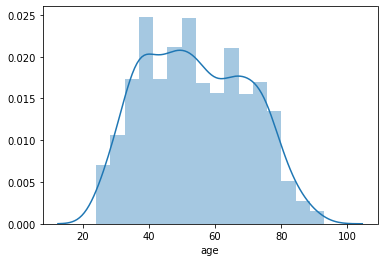

In [35]:
sns.distplot(df2['age'])

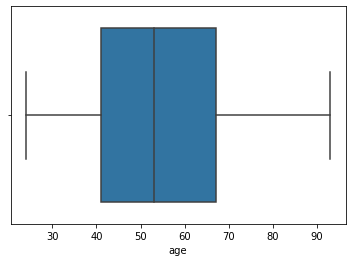

In [36]:
sns.boxplot(df2['age'])

In [19]:
#df3.skew()

In [20]:
# Kurtosis is truly the measure of outliers in the data.
#df3.kurtosis()

# Bivariate and Multivariate Analysis

# Bi-Variate Analysis with Target variable

In [ ]:
#Age against vote

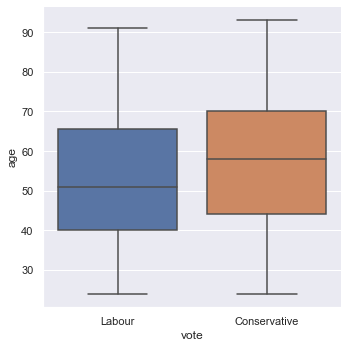

In [84]:
#sns.boxplot(df2['vote'],df3['age'])
sns.catplot(x="vote", y="age", kind="box", data=df2);

In [ ]:
The distribution seems to be more or less equal and is normally distributed.
Comparatively More number of older people voted for Labour and More number of Younger people have voted for Labour.

In [ ]:
#'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'

 #economic.cond.national against vote

In [85]:
#sns.boxplot(df3['vote'],df3['economic.cond.national'])

In [ ]:
# It is evident that people with moderate economic condition voted for Labour 
#and with very low condition voted for Conservative

In [ ]:
#economic.cond.household against vote

In [86]:
#sns.boxplot(df3['vote'],df3['economic.cond.household'])

In [ ]:
# It is evident that people with moderate economic household condition voted for Labour 
#and with very low condition voted for Conservative

In [ ]:
#Blair agaisnt vote

In [87]:
#sns.boxplot(df3['vote'],df3['Blair'])

In [88]:
#sns.countplot(df3['economic.cond.national'],hue=df3['vote'])

In [89]:
#sns.boxplot(df3['vote'],df3['Hague'])

In [ ]:
# Majority 

In [ ]:
#'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'

In [90]:
#sns.catplot(y="economic.cond.national", hue="vote", kind="count",palette="pastel", edgecolor=".6",data=df2);

In [92]:
#sns.catplot(y="economic.cond.household", hue="vote", kind="count",palette="pastel", edgecolor=".6",data=df2);

In [94]:
#sns.catplot(y="Blair", kind="count",palette="pastel", edgecolor=".6",data=df2);

In [95]:
#sns.catplot(y="Hague", kind="count",palette="pastel", edgecolor=".6",data=df2);

In [96]:
#sns.catplot(y="Europe", kind="count",palette="pastel", edgecolor=".6",data=df2);

In [97]:
#sns.catplot(y="political.knowledge", hue="vote",kind="count",palette="pastel", edgecolor=".6",data=df2);

In [98]:
#sns.catplot(y="gender", hue="vote", kind="count",palette="pastel", edgecolor=".6",data=df2);

In [99]:
#f, ax = plt.subplots(figsize=(7, 3))
#sns.countplot(y="Blair", data=df3, color="c");

In [100]:
#sns.catplot(y="vote", kind="count",palette="pastel", edgecolor=".6",data=df2);

In [101]:
#sns.catplot(data=df3, orient="v", kind="box");

# Correlation plot

plt.figure(figsize=(10,8))
sns.heatmap(df2.corr(),annot=True)
plt.show()

In [142]:
#sns.pairplot(df3)

In [ ]:
# Bivariate Analysis using bar plot()

['economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']

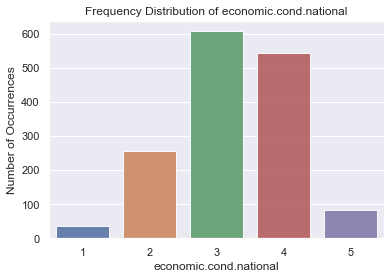

In [115]:
econat_count = df2['economic.cond.national'].value_counts()
sns.set(style="darkgrid")
sns.barplot(econat_count.index, econat_count.values, alpha=0.9)
plt.title('Frequency Distribution of economic.cond.national')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('economic.cond.national', fontsize=12)
plt.show()

Assessment of current national economic conditions, 1 to 5. 1-37 2-257, 3-607, 4 -542, 5- 82. order-3,4,2,5,1.
if we rate 1-very low, 2 - low, 3-medium, 4 - high, 5 - very high, then current economic condition of national is good.

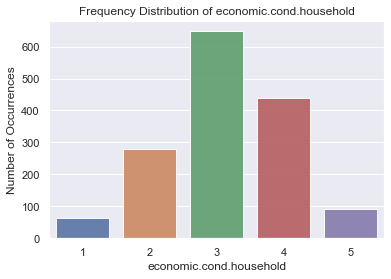

In [52]:
ecohous_count = df2['economic.cond.household'].value_counts()
sns.set(style="darkgrid")
sns.barplot(ecohous_count.index, ecohous_count.values, alpha=0.9)
plt.title('Frequency Distribution of economic.cond.household')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('economic.cond.household', fontsize=12)
plt.show()

Assessment of current household economic conditions, 1 to 5. 1-65, 2-280, 3- 648, 4-440, 5-92, order-3,4,2,5,1
if we rate 1-very low, 2 - low, 3-medium, 4 - high, 5 - very high, then current economic condition of household is good.

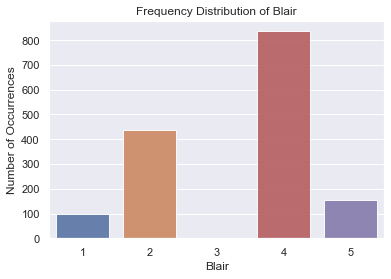

In [120]:
bla_count = df2['Blair'].value_counts()
sns.set(style="darkgrid")
sns.barplot(bla_count.index, bla_count.values, alpha=0.9)
plt.title('Frequency Distribution of Blair')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Blair', fontsize=12)
plt.show()

Assessment of the Labour leader- 'Blair', 1 to 5. 1-97, 2-438, 3-1, 4-836, 5-153, order - 4,2,5,1,3
if we rate 1-very low, 2 - low, 3-medium, 4 - high, 5 - very high, then rating of 'Blair' is high.

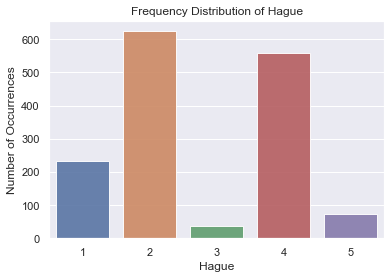

In [121]:
hag_count = df2['Hague'].value_counts()
sns.set(style="darkgrid")
sns.barplot(hag_count.index, hag_count.values, alpha=0.9)
plt.title('Frequency Distribution of Hague')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Hague', fontsize=12)
plt.show()

Assessment of the Conservative leader, 1 to 5. 2- 624, 4 - 558, 1 - 233, 5 - 73, 3 -  37
if we rate 1-very low, 2 - low, 3-medium, 4 - high, 5 - very high, then rating of 'Hague' is moderately good.

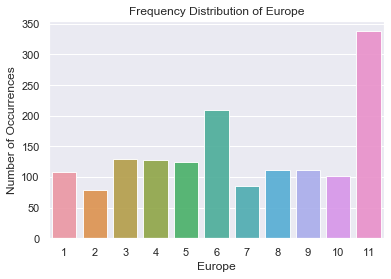

In [122]:
Europe_count = df2['Europe'].value_counts()
sns.set(style="darkgrid")
sns.barplot(Europe_count.index, Europe_count.values, alpha=0.9)
plt.title('Frequency Distribution of Europe')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Europe', fontsize=12)
plt.show()

Europe measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment. 
1-109, 2-79, 3-129, 4-127, 5-124, 6-209, 7-86, 8-112, 9-111,10-101.
order - 11,6,3,4,5,8,9,1,10,7,2. Thus, rating of ‘Eurosceptic’ sentiment is high.

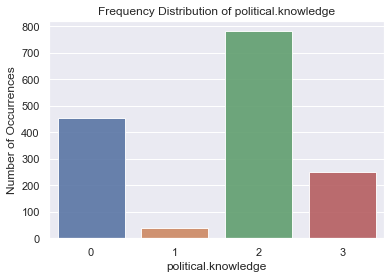

In [123]:
polk_count = df2['political.knowledge'].value_counts()
sns.set(style="darkgrid")
sns.barplot(polk_count.index, polk_count.values, alpha=0.9)
plt.title('Frequency Distribution of political.knowledge')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('political.knowledge', fontsize=12)
plt.show()

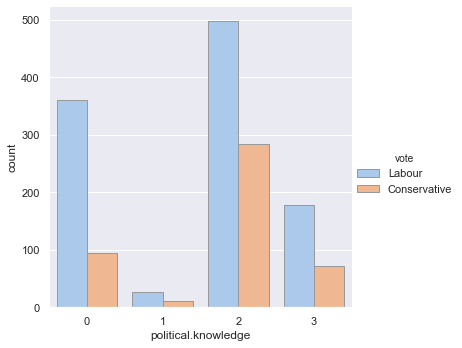

In [117]:
sns.catplot(x="political.knowledge", hue="vote",kind="count",palette="pastel", edgecolor=".6",data=df2);

0-455, 1-38, 2- 782, 3-250
order - 2,0,3,1. Labour party has good knowledge in European integration compared to Conservative party

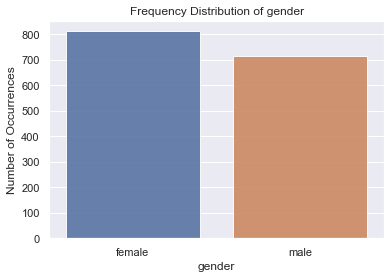

In [125]:
gend_count = df2['gender'].value_counts()
sns.set(style="darkgrid")
sns.barplot(gend_count.index, gend_count.values, alpha=0.9)
plt.title('Frequency Distribution of gender')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('gender', fontsize=12)
plt.show()

female    812(more no. of female )
male      713(less). More number of female voters than male.

In [53]:
df3.head(2)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male


In [158]:
df2=df2.drop('Unnamed: 0',axis=1)

In [159]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


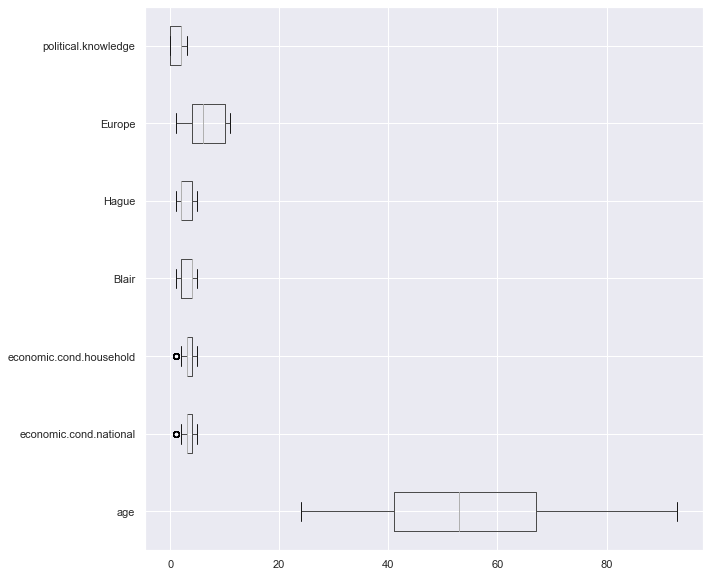

In [160]:
plt.figure(figsize=(10,10))
df2.boxplot(vert=0)
plt.show()
#plt.savefig('outliers_election.png')

In [163]:
cat=[]
num=[]
for i in df2.columns:
    if df2[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [164]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [165]:
for column in df2[num].columns:
    lr,ur=remove_outlier(df2[column])
    df2[column]=np.where(df2[column]>ur,ur,df2[column])
    df2[column]=np.where(df2[column]<lr,lr,df2[column])

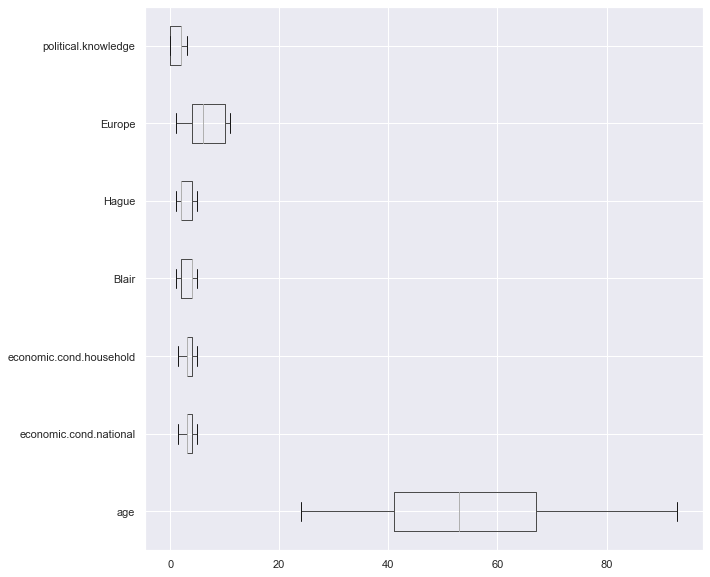

In [166]:
plt.figure(figsize=(10,10))
df2.boxplot(vert=0)

df2.info()

# Checking for Correlations

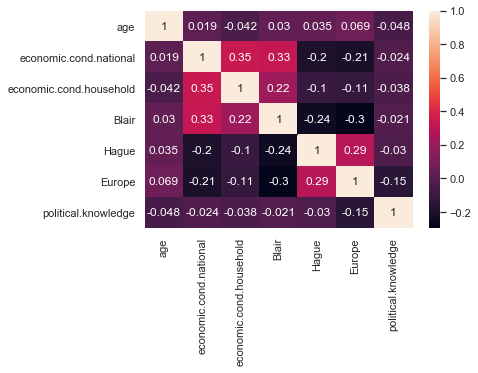

In [126]:
sns.heatmap(df2.corr(), annot=True)

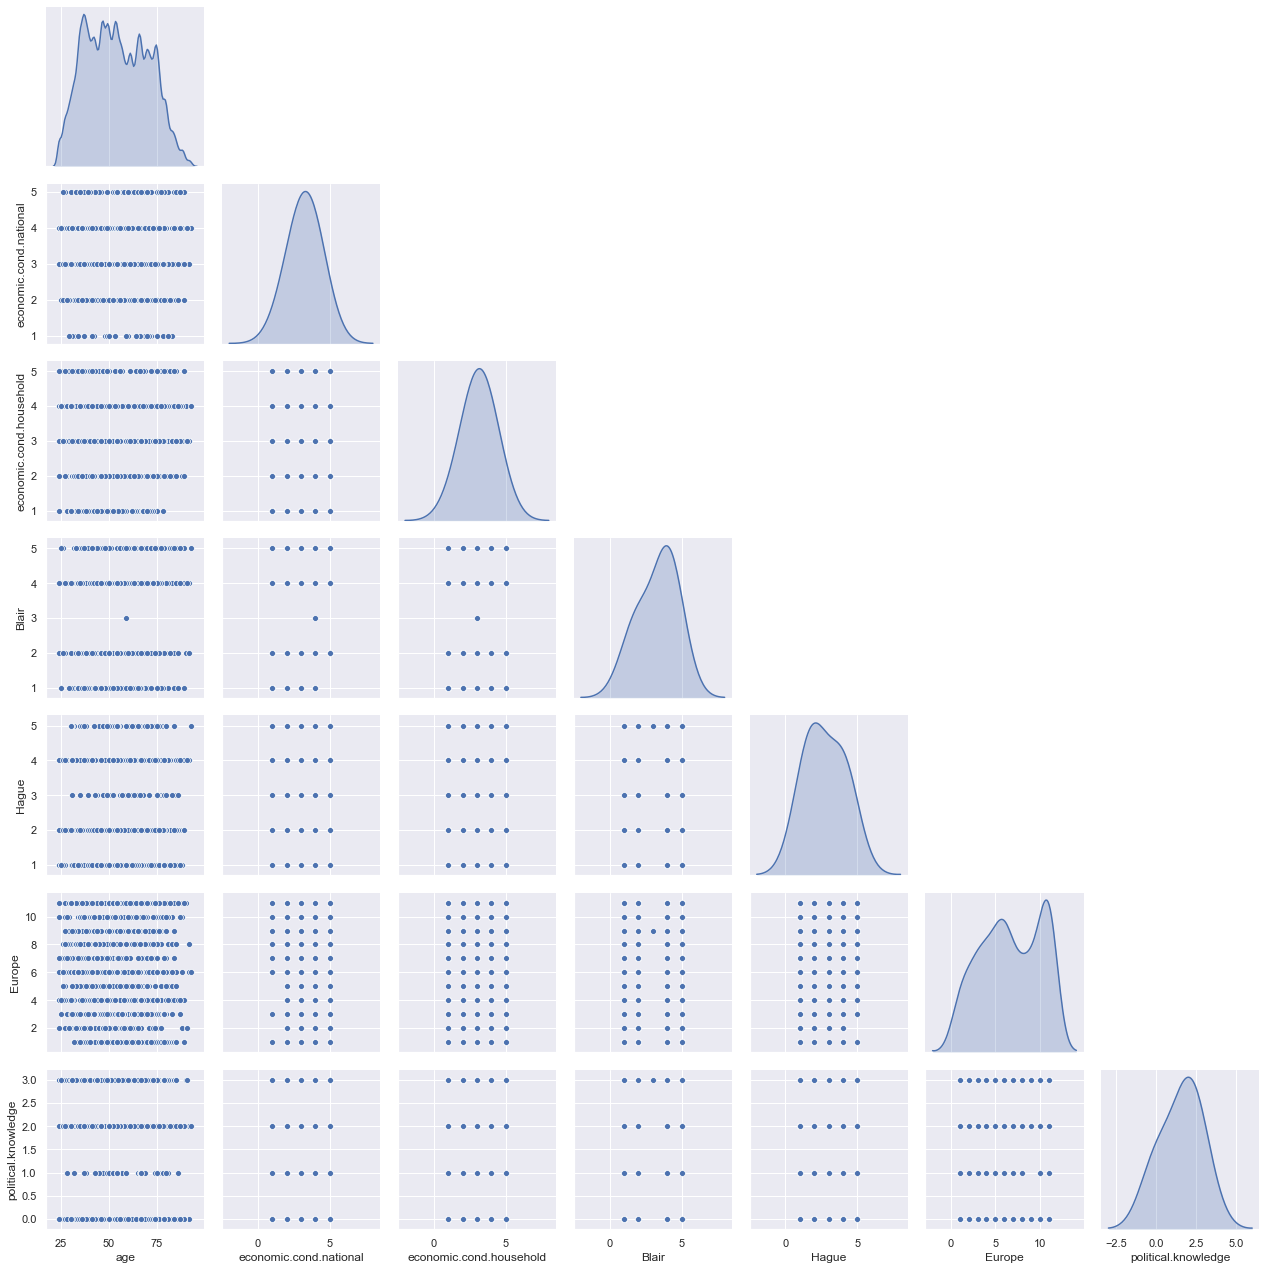

In [128]:
# Pairplot using sns
sns.pairplot(df2, diag_kind = 'kde', corner=True, diag_kws={'bw':1.0})

In [167]:
for feature in df2.columns: 
    if df2[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df2[feature].unique()))
        print(pd.Categorical(df2[feature].unique()).codes)
        df2[feature] = pd.Categorical(df2[feature]).codes



feature: vote
[Labour, Conservative]
Categories (2, object): [Conservative, Labour]
[1 0]


feature: gender
[female, male]
Categories (2, object): [female, male]
[0 1]


In [168]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vote                     1525 non-null   int8   
 1   age                      1525 non-null   float64
 2   economic.cond.national   1525 non-null   float64
 3   economic.cond.household  1525 non-null   float64
 4   Blair                    1525 non-null   float64
 5   Hague                    1525 non-null   float64
 6   Europe                   1525 non-null   float64
 7   political.knowledge      1525 non-null   float64
 8   gender                   1525 non-null   int8   
dtypes: float64(7), int8(2)
memory usage: 86.5 KB


In [ ]:
# Proportion in the Target classes

In [169]:
df2.vote.value_counts(normalize=True)

1    0.697049
0    0.302951
Name: vote, dtype: float64

In [191]:
df2.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43.0,3.0,3.0,4.0,1.0,2.0,2.0,0
1,1,36.0,4.0,4.0,4.0,4.0,5.0,2.0,1
2,1,35.0,4.0,4.0,5.0,2.0,3.0,2.0,1
3,1,24.0,4.0,2.0,2.0,1.0,4.0,0.0,0
4,1,41.0,2.0,2.0,1.0,1.0,6.0,2.0,1


In [190]:
print(num)

['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [192]:
df2[num] = df2[num].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [523]:
df2.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,0.275362,0.428571,0.428571,0.75,0.00,0.1,0.666667,0
1,1,0.173913,0.714286,0.714286,0.75,0.75,0.4,0.666667,1
2,1,0.159420,0.714286,0.714286,1.00,0.25,0.2,0.666667,1
3,1,0.000000,0.714286,0.142857,0.25,0.00,0.3,0.000000,0
4,1,0.246377,0.142857,0.142857,0.00,0.00,0.5,0.666667,1


In [524]:
# Copy all the predictor variables into X dataframe
X = df2.drop('vote', axis=1)

# Copy target into the y dataframe.  
y = df2['vote']

In [525]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0.275362,0.428571,0.428571,0.75,0.00,0.1,0.666667,0
1,0.173913,0.714286,0.714286,0.75,0.75,0.4,0.666667,1
2,0.159420,0.714286,0.714286,1.00,0.25,0.2,0.666667,1
3,0.000000,0.714286,0.142857,0.25,0.00,0.3,0.000000,0
4,0.246377,0.142857,0.142857,0.00,0.00,0.5,0.666667,1


In [526]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: vote, dtype: int8

In [527]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [528]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (1067, 8)
X_test (458, 8)
y_train (1067,)
y_test (458,)


 # LOGISTIC REGRESSION
 

In [533]:
# Fit the Logistic Regression model
LR_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2,random_state=1)
LR_model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', random_state=1,
                   solver='newton-cg', verbose=True)

# Predicting on Training and Test dataset

In [534]:
ytrain_predict = LR_model.predict(X_train)
ytest_predict = LR_model.predict(X_test)

# Getting the Predicted Classes and Probs

In [535]:
ytest_predict_prob=LR_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.921946,0.078054
1,0.690526,0.309474
2,0.346669,0.653331
3,0.488887,0.511113
4,0.158897,0.841103


# Model Evaluation

In [536]:
# Accuracy - Training Data
lr_train_acc=model.score(X_train, y_train)
lr_train_acc

0.8078725398313027

# AUC and ROC for the training data

LR_Train_AUC: 0.890


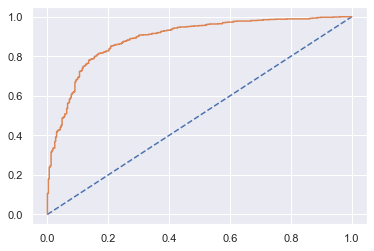

In [537]:
# predict probabilities
probs = LR_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('LR_Train_AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [538]:
# Accuracy - Test Data
lr_test_acc=LR_model.score(X_test, y_test)
lr_test_acc

0.8209606986899564

In [ ]:
#AUC and ROC for the test data

LR_Test_AUC: 0.883


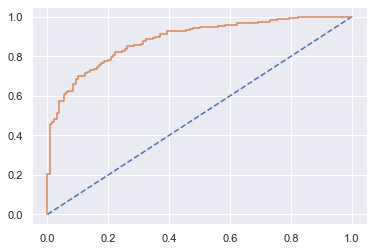

In [540]:
# predict probabilities
probs = LR_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('LR_Test_AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

# Confusion Matrix for the training data

In [541]:
confusion_matrix(y_train, ytrain_predict)

array([[230, 102],
       [ 68, 667]], dtype=int64)

In [542]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [543]:
print("Labour Vote - train data")
lr_train_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(lr_train_metrics).transpose()
lr_train_precision=round(df.loc["1"][0],2)
lr_train_recall=round(df.loc["1"][1],2)
lr_train_f1=round(df.loc["1"][2],2)
print ('lgr_train_precision ',lr_train_precision)
print ('lgr_train_recall ',lr_train_recall)
print ('lgr_train_f1 ',lr_train_f1)

Labour Vote - train data
lgr_train_precision  0.87
lgr_train_recall  0.91
lgr_train_f1  0.89


print("Conservative Vote - train data")
lgr_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(lgr_metrics).transpose()
lgr_train_precision=round(df.loc["0"][0],2)
lgr_train_recall=round(df.loc["0"][1],2)
lgr_train_f1=round(df.loc["0"][2],2)
print ('lgr_train_precision ',lgr_train_precision)
print ('lgr_train_recall ',lgr_train_recall)
print ('lgr_train_f1 ',lgr_train_f1)

ROC Train data 0.8001270387673142


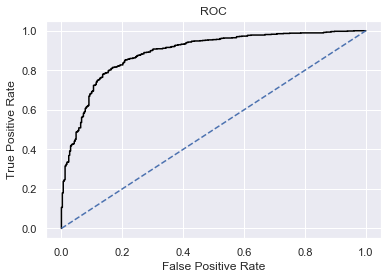

In [544]:
lr_train_fpr, lr_train_tpr,_=roc_curve(y_train,LR_model.predict_proba(X_train)[:,1])
plt.plot(lr_train_fpr,lr_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
lr_train_roc=roc_auc_score(y_train,LR_model.predict(X_train))
print('ROC Train data', lr_train_roc)

# Confusion Matrix for test data

In [545]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[ 85,  45],
       [ 37, 291]], dtype=int64)

In [546]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.70      0.65      0.67       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



In [547]:
print("Labour vote - Test data")
lr_test_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(lr_test_metrics).transpose()
lr_test_precision=round(df.loc["1"][0],2)
lr_test_recall=round(df.loc["1"][1],2)
lr_test_f1=round(df.loc["1"][2],2)
print ('lr_test_precision ',lr_test_precision)
print ('lr_test_recall ',lr_test_recall)
print ('lr_test_f1 ',lr_test_f1)

Labour vote - Test data
lr_test_precision  0.87
lr_test_recall  0.89
lr_test_f1  0.88


print("Conservative vote - Test data")
lgr_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(lgr_metrics).transpose()
lgr_test_precision=round(df.loc["1.0"][0],2)
lgr_test_recall=round(df.loc["1.0"][1],2)
lgr_test_f1=round(df.loc["1.0"][2],2)
print ('lgr_test_precision ',lgr_test_precision)
print ('lgr_test_recall ',lgr_test_recall)
print ('lgr_test_f1 ',lgr_test_f1)

ROC -Test data 0.7567307692307692


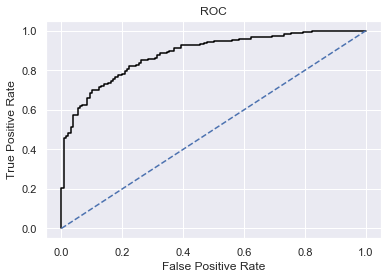

In [866]:
lr_test_fpr, lr_test_tpr,_=roc_curve(y_test,LR_model.predict_proba(X_test)[:,1])
plt.plot(lr_test_fpr,lr_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
lr_test_roc=roc_auc_score(y_test,model.predict(X_test))
print('ROC -Test data', lr_test_roc)

In [ ]:
Conclusion

In [ ]:
Accuracy on Test data is 82% and on Train data is 84%.
AUC score of test data is 89% and train data is 89%(same)
AUC-ROC score of test data is 77% and train data is 80%.
Recall(87-91) and Precision(87%) of class 1 is nearly same for test and train data.
While the model results between training and test sets are similar, indicating no under or overfitting issues, 
overall prediction of the model is weaker in terms of predicting class 0. Imbalance problem needs to fixed.

In [ ]:
# MODEL TUNING

In [549]:
from sklearn.model_selection import GridSearchCV
lr_mt = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_lr = GridSearchCV(lr_mt, param_grid = grid_values,scoring = 'accuracy')
grid_lr.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",grid_lr.best_params_)
print("accuracy :",grid_lr.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 5, 'penalty': 'l2'}
accuracy : 0.8341231187749549


# Predicting on Training and Test dataset

In [550]:
ytrain_predict = grid_lr.predict(X_train)
ytest_predict = grid_lr.predict(X_test)

# Getting the Predicted Classes and Probs

In [551]:
ytest_predict_prob=grid_lr.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.917892,0.082108
1,0.686399,0.313601
2,0.346846,0.653154
3,0.487500,0.512500
4,0.163379,0.836621


# Model Evaluation

In [553]:
# Accuracy - Training Data
grid_lr_train_acc=grid_lr.score(X_train, y_train)
grid_lr_train_acc

0.8406747891283973

# AUC and ROC for the training data

grid_lr_train_ AUC: 0.890


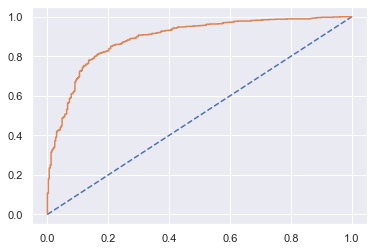

In [555]:
# predict probabilities
probs = grid_lr.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
grid_lr_train_auc = roc_auc_score(y_train, probs)
print('grid_lr_train_ AUC: %.3f' % grid_lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [556]:
# Accuracy - Test Data
grid_lr_test_acc=grid_lr.score(X_test, y_test)
grid_lr_test_acc

0.8209606986899564

In [ ]:
#AUC and ROC for the test data

grid_lr_test_AUC: 0.883


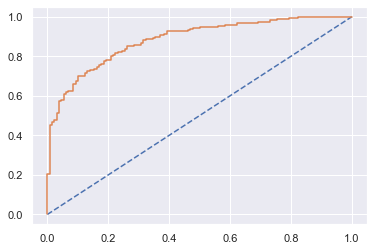

In [557]:
# predict probabilities
probs = grid_lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
grid_lr_test_auc = roc_auc_score(y_test, probs)
print('grid_lr_test_AUC: %.3f' % grid_lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

# Confusion Matrix for the training data

In [558]:
confusion_matrix(y_train, ytrain_predict)

array([[230, 102],
       [ 68, 667]], dtype=int64)

In [559]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [560]:
print("Labour Vote - train data")
grid_lr_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(grid_lr_metrics).transpose()
grid_lr_train_precision=round(df.loc["1"][0],2)
grid_lr_train_recall=round(df.loc["1"][1],2)
grid_lr_train_f1=round(df.loc["1"][2],2)
print ('grid_lr_train_precision ',grid_lr_train_precision)
print ('grid_lr_train_recall ',grid_lr_train_recall)
print ('grid_lr_train_f1 ',grid_lr_train_f1)

Labour Vote - train data
grid_lr_train_precision  0.87
grid_lr_train_recall  0.91
grid_lr_train_f1  0.89


Grid LR ROC Train data 0.8001270387673142


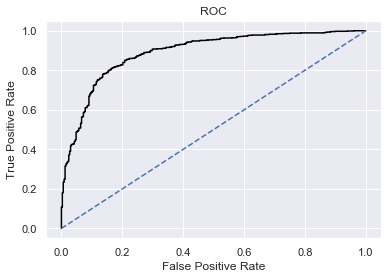

In [865]:
grid_lr_train_fpr, grid_lr_train_tpr,_=roc_curve(y_train,grid_lr.predict_proba(X_train)[:,1])
plt.plot(grid_lr_train_fpr,grid_lr_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
grid_lr_train_roc=roc_auc_score(y_train,grid_lgr_acc.predict(X_train))
print('Grid LR ROC Train data', grid_lr_train_roc)

# Confusion Matrix for test data

In [562]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[ 85,  45],
       [ 37, 291]], dtype=int64)

In [563]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.70      0.65      0.67       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



In [564]:
print("Labour vote - Test data")
grid_lr_test_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(grid_lr_test_metrics).transpose()
grid_lr_test_precision=round(df.loc["1"][0],2)
grid_lr_test_recall=round(df.loc["1"][1],2)
grid_lr_test_f1=round(df.loc["1"][2],2)
print ('grid_lr_test_precision ',grid_lr_test_precision)
print ('grid_lr_test_recall ',grid_lr_test_recall)
print ('grid_lr_test_f1 ',grid_lr_test_f1)

Labour vote - Test data
grid_lr_test_precision  0.87
grid_lr_test_recall  0.89
grid_lr_test_f1  0.88


lgr_test_fpr, lgr_test_tpr,_=roc_curve(y_test,grid_lgr_acc.predict_proba(X_test)[:,1])
plt.plot(lgr_test_fpr,lgr_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
lgr_test_auc=roc_auc_score(y_test,grid_lgr_acc.predict(X_test))
print('Area under Curve -Test data', lgr_test_auc)

Grid LR ROC Train data 0.8001270387673142


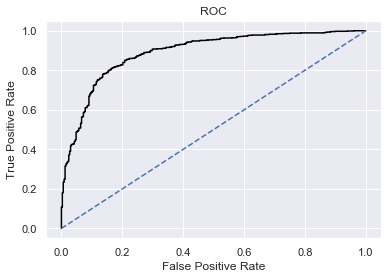

In [867]:
grid_lr_test_fpr, grid_lr_test_tpr,_=roc_curve(y_train,grid_lr.predict_proba(X_train)[:,1])
plt.plot(grid_lr_test_fpr,grid_lr_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
grid_lr_test_roc=roc_auc_score(y_train,grid_lgr_acc.predict(X_train))
print('Grid LR ROC Train data', grid_lr_train_roc)

In [ ]:
Conclusion - Model tuning has no impact...

In [ ]:
Accuracy on Test data is 82% and on Train data is 84%.
AUC score of test data is 89% and train data is 89%(same)
AUC-ROC score of test data is 77% and train data is 80%.
Recall(87-91) and Precision(87%) of class 1 is nearly same for test and train data.
While the model results between training and test sets are similar, indicating no under or overfitting issues, 
overall prediction of the model is weaker in terms of predicting class 0. Imbalance problem needs to fixed.

# SMOTE

In [565]:
from imblearn.over_sampling import SMOTE

SMOTE is only applied on the train data set

In [566]:
sm = SMOTE(random_state=1)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [567]:
## Let's check the shape after SMOTE
X_train_res.shape

(1470, 8)

# Logistic Regression with SMOTE

In [568]:
# Fit the Logistic Regression model
LR_sm_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2,random_state=1)
LR_sm_model.fit(X_train_res, y_train_res)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.7s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', random_state=1,
                   solver='newton-cg', verbose=True)

# Predicting on Training and Test dataset

In [569]:
ytrain_predict_res = LR_sm_model.predict(X_train_res)
#ytest_predict = model.predict(X_test_res)

# Model Evaluation

In [824]:
# Accuracy - Training Data
lr_sm_train_acc=LR_sm_model.score(X_train_res, y_train_res)
lr_sm_train_acc

0.8251700680272109

# AUC and ROC for the training data

lr_sm_train_AUC: 0.896


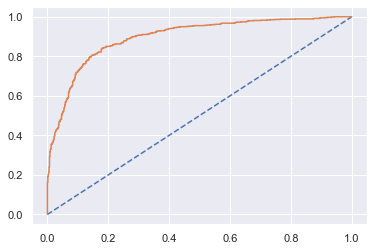

In [571]:
# predict probabilities
probs = LR_sm_model.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_sm_train_auc = roc_auc_score(y_train_res, probs)
print('lr_sm_train_AUC: %.3f' % lr_sm_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

# Confusion Matrix for the training data

In [572]:
confusion_matrix(y_train_res, ytrain_predict_res)

array([[605, 130],
       [127, 608]], dtype=int64)

In [573]:
print(classification_report(y_train_res, ytrain_predict_res))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       735
           1       0.82      0.83      0.83       735

    accuracy                           0.83      1470
   macro avg       0.83      0.83      0.83      1470
weighted avg       0.83      0.83      0.83      1470



In [574]:
print("Labour Vote - train data")
lr_sm_train_metrics=classification_report(y_train_res, ytrain_predict_res,output_dict=True)
df=pd.DataFrame(lr_sm_train_metrics).transpose()
lr_sm_train_precision=round(df.loc["1"][0],2)
lr_sm_train_recall=round(df.loc["1"][1],2)
lr_sm_train_f1=round(df.loc["1"][2],2)
print ('lr_sm_train_precision ',lr_sm_train_precision)
print ('lr_sm_train_recall ',lr_sm_train_recall)
print ('lr_sm_train_f1 ',lr_sm_train_f1)

Labour Vote - train data
lr_sm_train_precision  0.82
lr_sm_train_recall  0.83
lr_sm_train_f1  0.83


print("Conservative Vote - train data")
lgr_metrics=classification_report(y_train_res, ytrain_predict_res,output_dict=True)
df=pd.DataFrame(lgr_metrics).transpose()
lgr_train_precision=round(df.loc["0"][0],2)
lgr_train_recall=round(df.loc["0"][1],2)
lgr_train_f1=round(df.loc["0"][2],2)
print ('lgr_train_precision ',lgr_train_precision)
print ('lgr_train_recall ',lgr_train_recall)
print ('lgr_train_f1 ',lgr_train_f1)

ROC LR sm Train data 0.8251700680272108


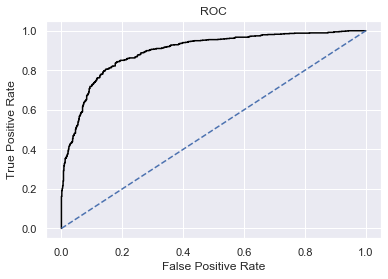

In [575]:
lr_sm_train_fpr, lr_sm_train_tpr,_=roc_curve(y_train_res,LR_sm_model.predict_proba(X_train_res)[:,1])
plt.plot(lr_sm_train_fpr,lr_sm_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
lr_sm_train_roc=roc_auc_score(y_train_res,LR_sm_model.predict(X_train_res))
print('ROC LR sm Train data', lr_sm_train_roc)

In [ ]:
Conclusion

In [ ]:
Accuracy on on Train data is 82%.(reduced 2%)
AUC score of train data is 90%(increased 1%)
AUC-ROC score of train data is 82%(increased 2%)
Recall(82-83) and Precision(82-83) of both class is nearly same for train data.
No imbalance issues.

# Linear Discriminant Analysis(LDA) Model

In [578]:
lda = LinearDiscriminantAnalysis()
ldam=lda.fit(X_train,y_train)

In [110]:
ldam

LinearDiscriminantAnalysis()

# Predicting on Training and Test dataset

In [579]:
ytrain_predict = ldam.predict(X_train)
ytest_predict = ldam.predict(X_test)

# Getting the Predicted Classes and Probs

In [580]:
ytest_predict_prob=ldam.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.943417,0.056583
1,0.743056,0.256944
2,0.340433,0.659567
3,0.496549,0.503451
4,0.140949,0.859051


# Model Evaluation

In [581]:
# Accuracy - Training Data
ldam_train_acc=ldam.score(X_train, y_train)
print("Accuracy score of training data is",ldam_train_acc)

Accuracy score of training data is 0.8397375820056232


# AUC and ROC for the training data

ldam_train_auc: 0.889


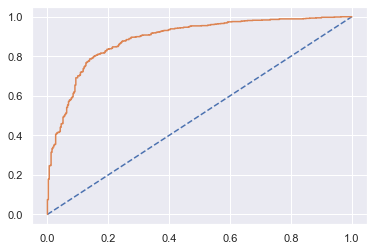

In [582]:
# predict probabilities
probs = ldam.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ldam_train_auc = roc_auc_score(y_train, probs)
print('ldam_train_auc: %.3f' % ldam_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [583]:
# Accuracy - Test Data
ldam_test_acc=ldam.score(X_test, y_test)
print("Accuracy score of test data is",ldam_test_acc)

Accuracy score of test data is 0.8187772925764192


# AUC and ROC for the test data

ldam_test_auc: 0.884


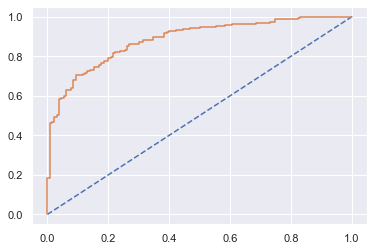

In [584]:
# predict probabilities
probs = ldam.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ldam_test_auc = roc_auc_score(y_test, probs)
print('ldam_test_auc: %.3f' % ldam_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

# Confusion Matrix for the training data

In [585]:
confusion_matrix(y_train, ytrain_predict)

array([[236,  96],
       [ 75, 660]], dtype=int64)

In [586]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.76      0.71      0.73       332
           1       0.87      0.90      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [587]:
ldam_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(ldam_metrics).transpose()
ldam_train_precision=round(df.loc["1"][0],2)
ldam_train_recall=round(df.loc["1"][1],2)
ldam_train_f1=round(df.loc["1"][2],2)
print ('ldam_train_precision ',ldam_train_precision)
print ('ldam_train_recall ',ldam_train_recall)
print ('ldam_train_f1 ',ldam_train_f1)

ldam_train_precision  0.87
ldam_train_recall  0.9
ldam_train_f1  0.89


LDA train ROC 0.8044012785837227


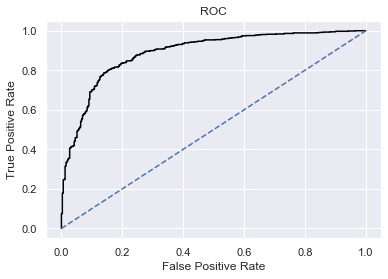

In [588]:
ldam_train_fpr, ldam_train_tpr,_=roc_curve(y_train,ldam.predict_proba(X_train)[:,1])
plt.plot(ldam_train_fpr,ldam_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
ldam_train_roc=roc_auc_score(y_train,ldam.predict(X_train))
print('LDA train ROC', ldam_train_roc)

# Confusion Matrix for the test data

In [589]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[ 86,  44],
       [ 39, 289]], dtype=int64)

In [590]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



In [591]:
ldam_test_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(ldam_test_metrics).transpose()
ldam_test_precision=round(df.loc["1"][0],2)
ldam_test_recall=round(df.loc["1"][1],2)
ldam_test_f1=round(df.loc["1"][2],2)
print ('ldam_test_precision ',ldam_test_precision)
print ('ldam_test_recall ',ldam_test_recall)
print ('ldam_test_f1 ',ldam_test_f1)

ldam_test_precision  0.87
ldam_test_recall  0.88
ldam_test_f1  0.87


LDA Test ROC 0.7713180112570357


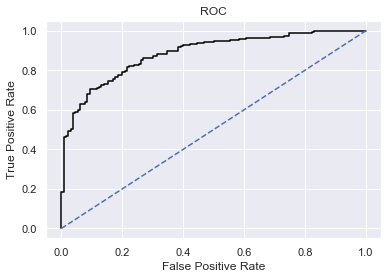

In [592]:
ldam_test_fpr, ldam_test_tpr,_=roc_curve(y_test,ldam.predict_proba(X_test)[:,1])
plt.plot(ldam_test_fpr,ldam_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
ldam_test_roc=roc_auc_score(y_test,ldam.predict(X_test))
print('LDA Test ROC', ldam_test_roc)

# Conclusion

In [ ]:
Accuracy on Test data is 82% and on Train data is 84%.
AUC score of test data is 89% and train data is 89%(same)
AUC-ROC score of test data is 77% and train data is 80%.
Recall(88-90) and Precision(87%) of class 1 is nearly same for test and train data.
While the model results between training and test sets are similar, indicating no under or overfitting issues, 
overall prediction of the model is weaker in terms of predicting class 0. Imbalance problem needs to fixed.

# Model Tuning - LDA

In [593]:
estimator_1 = LinearDiscriminantAnalysis(shrinkage='auto')
parameters_1 = {
    'solver': ('lsqr','eigen'),  #note svd does not run with shrinkage and models using it will be tuned separately
    'n_components': (1,5,1),
                   }
# with GridSearch
grid_search_lda_A = GridSearchCV(
    estimator=estimator_1,
    param_grid=parameters_1,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)
grid_search_lda_A.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",grid_search_lda_A.best_params_)
print("accuracy :",grid_search_lda_A.best_score_)

tuned hpyerparameters :(best parameters)  {'n_components': 1, 'solver': 'lsqr'}
accuracy : 0.8388091790619103


estimator_2 = LinearDiscriminantAnalysis(solver='svd', )#note svd does not run with shrinkage and models using it will be tuned separately
parameters_2 = {
    'n_components': (0,5,1),
    'store_covariance' :(True, False),
                   }
### with GridSearch-2 (note -accuracy is .8358 which is less than the above estimator
grid_search_lda_B = GridSearchCV(
    estimator=estimator_2,
    param_grid=parameters_2,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)
grid_search_lda_B.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",grid_search_lda_B.best_params_)
print("accuracy :",grid_search_lda_B.best_score_)

# Predicting on Training and Test dataset

In [594]:
ytrain_predict = grid_search_lda_A.predict(X_train)
ytest_predict = grid_search_lda_A.predict(X_test)

# Getting the Predicted Classes and Probs

In [595]:
ytest_predict_prob=grid_search_lda_A.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.950765,0.049235
1,0.760947,0.239053
2,0.356256,0.643744
3,0.516448,0.483552
4,0.152530,0.847470


# Model Evaluation

In [596]:
# Accuracy - Training Data
grid_lda_train_acc=grid_search_lda_A.score(X_train, y_train)
grid_lda_train_acc

0.8416119962511716

# AUC and ROC for the training data

grid_lda_train_auc: 0.890


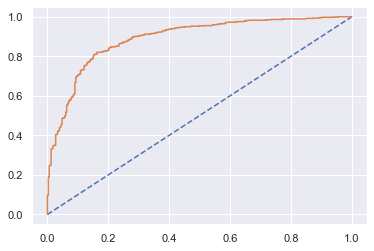

In [597]:
# predict probabilities
probs = grid_search_lda_A.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
grid_lda_train_auc = roc_auc_score(y_train, probs)
print('grid_lda_train_auc: %.3f' % grid_lda_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [598]:
# Accuracy - Test Data
grid_lda_test_acc=grid_search_lda_A.score(X_test, y_test)
grid_lda_test_acc

0.8231441048034934

In [ ]:
#AUC and ROC for the test data

grid_lda_test_auc: 0.886


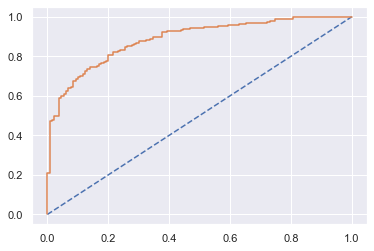

In [599]:
# predict probabilities
probs = grid_search_lda_A.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
grid_lda_test_auc = roc_auc_score(y_test, probs)
print('grid_lda_test_auc: %.3f' % grid_lda_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

# Confusion Matrix for the training data

In [600]:
confusion_matrix(y_train, ytrain_predict)

array([[238,  94],
       [ 75, 660]], dtype=int64)

In [601]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       332
           1       0.88      0.90      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.81      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [602]:
print("Labour Vote - train data")
grid_lda_train_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(grid_lda_train_metrics).transpose()
grid_lda_train_precision=round(df.loc["1"][0],2)
grid_lda_train_recall=round(df.loc["1"][1],2)
grid_lda_train_f1=round(df.loc["1"][2],2)
print ('grid_lda_train_precision ',grid_lda_train_precision)
print ('grid_lda_train_recall ',grid_lda_train_recall)
print ('grid_lda_train_f1 ',grid_lda_train_f1)

Labour Vote - train data
grid_lda_train_precision  0.88
grid_lda_train_recall  0.9
grid_lda_train_f1  0.89


Grid LDA train ROC 0.8074133267764938


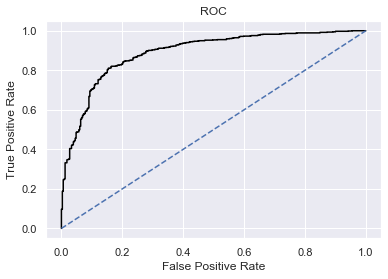

In [603]:
grid_lda_train_fpr, grid_lda_train_tpr,_=roc_curve(y_train,grid_search_lda_A.predict_proba(X_train)[:,1])
plt.plot(grid_lda_train_fpr,grid_lda_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
grid_lda_train_roc=roc_auc_score(y_train,grid_search_lda_A.predict(X_train))
print('Grid LDA train ROC', grid_lda_train_roc)

# Confusion Matrix for test data

In [604]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[ 89,  41],
       [ 40, 288]], dtype=int64)

In [605]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.69      0.68      0.69       130
           1       0.88      0.88      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



In [606]:
print("Labour vote - Test data")
grid_lda_test_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(grid_lda_test_metrics).transpose()
grid_lda_test_precision=round(df.loc["1"][0],2)
grid_lda_test_recall=round(df.loc["1"][1],2)
grid_lda_test_f1=round(df.loc["1"][2],2)
print ('grid_lda_test_precision ',grid_lda_test_precision)
print ('grid_lda_test_recall ',grid_lda_test_recall)
print ('grid_lda_test_f1 ',grid_lda_test_f1)

Labour vote - Test data
grid_lda_test_precision  0.88
grid_lda_test_recall  0.88
grid_lda_test_f1  0.88


Area under Curve -Test data 0.7813320825515948


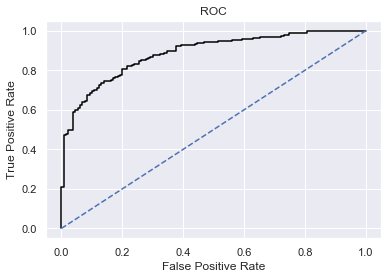

In [607]:
grid_lda_test_fpr, grid_lda_test_tpr,_=roc_curve(y_test,grid_search_lda_A.predict_proba(X_test)[:,1])
plt.plot(grid_lda_test_fpr,grid_lda_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
grid_lda_test_roc=roc_auc_score(y_test,grid_search_lda_A.predict(X_test))
print('Area under Curve -Test data', grid_lda_test_roc)

In [ ]:
Conclusion - Model tuning has no impact...

In [ ]:
Accuracy on Test data is 82% and on Train data is 84%.
AUC score of test data is 89% and train data is 89%(same)
AUC-ROC score of test data is 78% and train data is 81%.(1% increased)
Recall(88-90) and Precision(87%) of class 1 is nearly same for test and train data.
While the model results between training and test sets are similar, indicating no under or overfitting issues, 
overall prediction of the model is weaker in terms of predicting class 0. Imbalance problem needs to fixed.

# Linear Discriminant Analysis with SMOTE

In [608]:
# Fit the Logistic Regression model
lda_sm = LinearDiscriminantAnalysis()
lda_sm.fit(X_train_res,y_train_res)

LinearDiscriminantAnalysis()

# Predicting on Training and Test dataset

In [609]:
ytrain_predict_res = lda_sm.predict(X_train_res)
#ytest_predict = model.predict(X_test_res)

# Model Evaluation

In [610]:
# Accuracy - Training Data
lda_sm_train_acc=lda_sm.score(X_train_res, y_train_res)
lda_sm_train_acc

0.826530612244898

# AUC and ROC for the training data

lda_sm_train_auc: 0.896


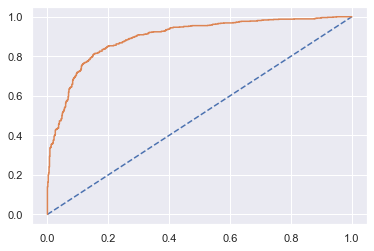

In [611]:
# predict probabilities
probs = lda_sm.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_sm_train_auc = roc_auc_score(y_train_res, probs)
print('lda_sm_train_auc: %.3f' % lda_sm_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

# Confusion Matrix for the training data

In [612]:
confusion_matrix(y_train_res, ytrain_predict_res)

array([[608, 127],
       [128, 607]], dtype=int64)

In [613]:
print(classification_report(y_train_res, ytrain_predict_res))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       735
           1       0.83      0.83      0.83       735

    accuracy                           0.83      1470
   macro avg       0.83      0.83      0.83      1470
weighted avg       0.83      0.83      0.83      1470



In [614]:
print("Labour Vote - train data")
lda_sm_metrics=classification_report(y_train_res, ytrain_predict_res,output_dict=True)
df=pd.DataFrame(lda_sm_metrics).transpose()
lda_sm_train_precision=round(df.loc["1"][0],2)
lda_sm_train_recall=round(df.loc["1"][1],2)
lda_sm_train_f1=round(df.loc["1"][2],2)
print ('lda_sm_train_precision ',lda_sm_train_precision)
print ('lda_sm_train_recall ',lda_sm_train_recall)
print ('lda_sm_train_f1 ',lda_sm_train_f1)

Labour Vote - train data
lda_sm_train_precision  0.83
lda_sm_train_recall  0.83
lda_sm_train_f1  0.83


print("Conservative Vote - train data")
lgr_metrics=classification_report(y_train_res, ytrain_predict_res,output_dict=True)
df=pd.DataFrame(lgr_metrics).transpose()
lgr_train_precision=round(df.loc["0"][0],2)
lgr_train_recall=round(df.loc["0"][1],2)
lgr_train_f1=round(df.loc["0"][2],2)
print ('lgr_train_precision ',lgr_train_precision)
print ('lgr_train_recall ',lgr_train_recall)
print ('lgr_train_f1 ',lgr_train_f1)

lda_sm_train_roc 0.8265306122448979


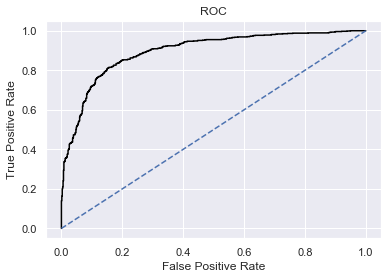

In [615]:
lda_sm_train_fpr, lda_sm_train_tpr,_=roc_curve(y_train_res,lda_sm.predict_proba(X_train_res)[:,1])
plt.plot(lda_sm_train_fpr,lda_sm_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
lda_sm_train_roc=roc_auc_score(y_train_res,lda_sm.predict(X_train_res))
print('lda_sm_train_roc', lda_sm_train_roc)

In [ ]:
Conclusion

In [ ]:
Accuracy on on Train data is 82%.(reduced 2%)
AUC score of train data is 90%(increased 1%)
AUC-ROC score of train data is 82%(increased 2%)
Recall(82-83) and Precision(82-83) of both class is nearly same for train data.
No imbalance issues.

# KNN Model

In [616]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

# Predicting on Training and Test dataset

In [617]:
ytrain_predict = KNN_model.predict(X_train)
ytest_predict = KNN_model.predict(X_test)

# Getting the Predicted Classes and Probs

In [618]:
ytest_predict_prob=KNN_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.6,0.4
1,0.8,0.2
2,0.4,0.6
3,0.4,0.6
4,0.0,1.0


# Model Evaluation

In [619]:
# Accuracy - Training Data
Knn_train_acc=KNN_model.score(X_train, y_train)
Knn_train_acc

0.8631677600749765

# AUC and ROC for the training data

knn_train_auc: 0.933


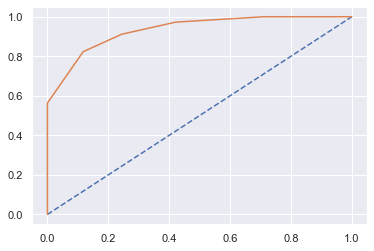

In [620]:
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_train_auc = roc_auc_score(y_train, probs)
print('knn_train_auc: %.3f' % knn_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [621]:
# Accuracy - Test Data
knn_test_acc=KNN_model.score(X_test, y_test)
knn_test_acc

0.8231441048034934

In [ ]:
#AUC and ROC for the test data

knn_test_auc: 0.866


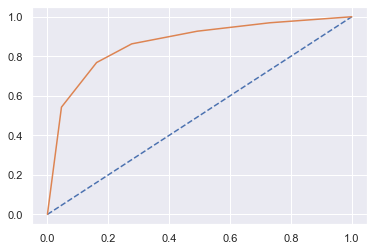

In [622]:
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_test_auc = roc_auc_score(y_test, probs)
print('knn_test_auc: %.3f' % knn_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

# Confusion Matrix for the training data

In [623]:
confusion_matrix(y_train, ytrain_predict)

array([[251,  81],
       [ 65, 670]], dtype=int64)

In [624]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77       332
           1       0.89      0.91      0.90       735

    accuracy                           0.86      1067
   macro avg       0.84      0.83      0.84      1067
weighted avg       0.86      0.86      0.86      1067



In [625]:
print("Labour Vote - train data")
knn_train_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(knn_train_metrics).transpose()
knn_train_precision=round(df.loc["1"][0],2)
knn_train_recall=round(df.loc["1"][1],2)
knn_train_f1=round(df.loc["1"][2],2)
print ('knn_train_precision ',knn_train_precision)
print ('knn_train_recall ',knn_train_recall)
print ('knn_train_f1 ',knn_train_f1)

Labour Vote - train data
knn_train_precision  0.89
knn_train_recall  0.91
knn_train_f1  0.9


print("Conservative Vote - train data")
knn_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(knn_metrics).transpose()
knn_train_precision=round(df.loc["0"][0],1)
knn_train_recall=round(df.loc["0"][1],1)
knn_train_f1=round(df.loc["0"][2],1)
print ('knn_train_precision ',knn_train_precision)
print ('knn_train_recall ',knn_train_recall)
print ('knn_train_f1 ',knn_train_f1)

knn_train_auc 0.8337943611179413


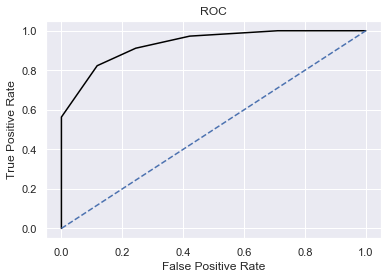

In [626]:
knn_train_fpr, knn_train_tpr,_=roc_curve(y_train,KNN_model.predict_proba(X_train)[:,1])
plt.plot(knn_train_fpr,knn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
knn_train_auc=roc_auc_score(y_train,KNN_model.predict(X_train))
print('knn_train_auc', knn_train_auc)

# Confusion Matrix for test data

In [627]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[ 94,  36],
       [ 45, 283]], dtype=int64)

In [628]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.86      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.82      0.82       458



In [629]:
print("Labour vote - Test data")
knn_test_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(knn_test_metrics).transpose()
knn_test_precision=round(df.loc["1"][0],2)
knn_test_recall=round(df.loc["1"][1],2)
knn_test_f1=round(df.loc["1"][2],2)
print ('knn_test_precision ',knn_test_precision)
print ('knn_test_recall ',knn_test_recall)
print ('knn_test_f1 ',knn_test_f1)

Labour vote - Test data
knn_test_precision  0.89
knn_test_recall  0.86
knn_test_f1  0.87


print("Conservative vote - Test data")
knn_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(knn_metrics).transpose()
knn_test_precision=round(df.loc["0"][0],1)
knn_test_recall=round(df.loc["0"][1],1)
knn_test_f1=round(df.loc["0"][2],1)
print ('knn_test_precision ',knn_test_precision)
print ('knn_test_recall ',knn_test_recall)
print ('knn_test_f1 ',knn_test_f1)

knn_test_auc 0.7929409005628518


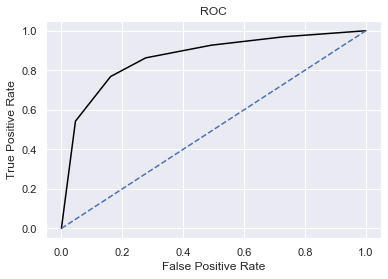

In [630]:
knn_test_fpr, knn_test_tpr,_=roc_curve(y_test,KNN_model.predict_proba(X_test)[:,1])
plt.plot(knn_test_fpr,knn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
knn_test_auc=roc_auc_score(y_test,KNN_model.predict(X_test))
print('knn_test_auc', knn_test_auc)

# Conclusion

In [ ]:
Accuracy on Test data is 82% and on Train data is 86%(inc.)
AUC score of test data is 93% and train data is 93%(same)(inc 4%)
AUC-ROC score of test data is 79% and train data is 83%.(inc)
Recall(86-91) and Precision(89%) of class 1 is nearly same for test and train data.
While the model results between training and test sets are similar, indicating no under or overfitting issues, 
overall prediction of the model is weaker in terms of predicting class 0. Imbalance problem needs to fixed.

# MODEL TUNING - KNN Model

In [297]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 24


# Predicting on Training and Test dataset

In [631]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

# Getting the Predicted Classes and Probs

In [632]:
ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.833333,0.166667
1,0.708333,0.291667
2,0.375000,0.625000
3,0.500000,0.500000
4,0.166667,0.833333


# Model Evaluation

In [633]:
# Accuracy - Training Data
grid_knn_train_acc=best_model.score(X_train, y_train)
grid_knn_train_acc

0.8369259606373008

# AUC and ROC for the training data

grid_knn_train_auc: 0.902


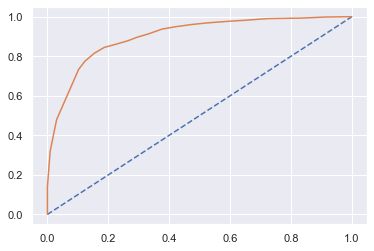

In [634]:
# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
grid_knn_train_auc = roc_auc_score(y_train, probs)
print('grid_knn_train_auc: %.3f' % grid_knn_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [635]:
# Accuracy - Test Data
grid_knn_test_acc=best_model.score(X_test, y_test)
grid_knn_test_acc

0.8296943231441049

In [ ]:
#AUC and ROC for the test data

grid_knn_test_auc: 0.897


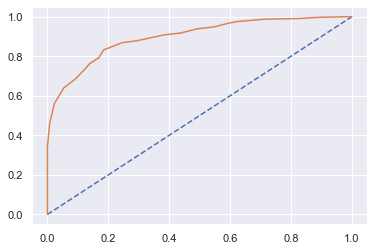

In [636]:
# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
grid_knn_test_auc = roc_auc_score(y_test, probs)
print('grid_knn_test_auc: %.3f' % grid_knn_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

# Confusion Matrix for the training data

In [637]:
confusion_matrix(y_train, ytrain_predict)

array([[234,  98],
       [ 76, 659]], dtype=int64)

In [638]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.75      0.70      0.73       332
           1       0.87      0.90      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067



In [639]:
print("Labour Vote - train data")
grid_knn_train_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(grid_knn_train_metrics).transpose()
grid_knn_train_precision=round(df.loc["1"][0],2)
grid_knn_train_recall=round(df.loc["1"][1],2)
grid_knn_train_f1=round(df.loc["1"][2],2)
print ('grid_knn_train_precision ',grid_knn_train_precision)
print ('grid_knn_train_recall ',grid_knn_train_recall)
print ('grid_knn_train_f1 ',grid_knn_train_f1)

Labour Vote - train data
grid_knn_train_precision  0.87
grid_knn_train_recall  0.9
grid_knn_train_f1  0.88


grid_knn_train_roc 0.8007089582821081


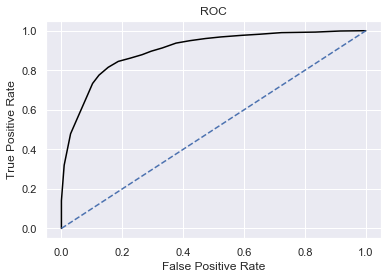

In [640]:
grid_knn_train_fpr, grid_knn_train_tpr,_=roc_curve(y_train,best_model.predict_proba(X_train)[:,1])
plt.plot(grid_knn_train_fpr,grid_knn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
grid_knn_train_roc=roc_auc_score(y_train,best_model.predict(X_train))
print('grid_knn_train_roc', grid_knn_train_roc)

# Confusion Matrix for test data

In [641]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[ 92,  38],
       [ 40, 288]], dtype=int64)

In [642]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.70      0.71      0.70       130
           1       0.88      0.88      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



In [643]:
print("Labour vote - Test data")
grid_knn_test_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(grid_knn_test_metrics).transpose()
grid_knn_test_precision=round(df.loc["1"][0],2)
grid_knn_test_recall=round(df.loc["1"][1],2)
grid_knn_test_f1=round(df.loc["1"][2],2)
print ('grid_knn_test_precision ',grid_knn_test_precision)
print ('grid_knn_test_recall ',grid_knn_test_recall)
print ('grid_knn_test_f1 ',grid_knn_test_f1)

Labour vote - Test data
grid_knn_test_precision  0.88
grid_knn_test_recall  0.88
grid_knn_test_f1  0.88


grid_knn_test_roc 0.7928705440900562


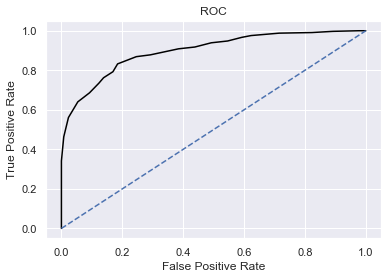

In [644]:
grid_knn_test_fpr, grid_knn_test_tpr,_=roc_curve(y_test,best_model.predict_proba(X_test)[:,1])
plt.plot(grid_knn_test_fpr,grid_knn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
grid_knn_test_roc=roc_auc_score(y_test,best_model.predict(X_test))
print('grid_knn_test_roc', grid_knn_test_roc)

In [ ]:
Conclusion - Model tuning has no impact...

In [ ]:
Accuracy on Test data is 83% and on Train data is 83%(same)(inc/dec)
AUC score of test data is 90% and train data is 90%(same)(inc. 1%)
AUC-ROC score of test data is 79% (2% inc.)and train data is 80%.
Recall(80-87) and Precision(88%) of class 1 is nearly same for test and train data.
While the model results between training and test sets are similar, indicating no under or overfitting issues, 
overall prediction of the model is weaker in terms of predicting class 0. Imbalance problem needs to fixed.

In [ ]:
# KNN with SMOTE

In [645]:
KNN_model_sm=KNeighborsClassifier()
KNN_model_sm.fit(X_train_res,y_train_res)

KNeighborsClassifier()

# Predicting on Training and Test dataset

In [646]:
ytrain_predict_res = KNN_model_sm.predict(X_train_res)
#ytest_predict = model.predict(X_test_res)

# Model Evaluation

In [647]:
# Accuracy - Training Data
knn_sm_train_acc=KNN_model_sm.score(X_train_res, y_train_res)
knn_sm_train_acc

0.8863945578231293

# AUC and ROC for the training data

knn_sm_train_auc: 0.967


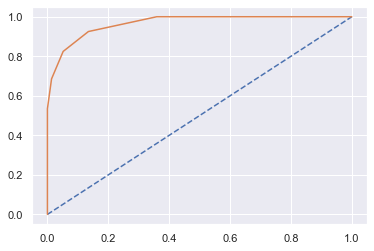

In [648]:
# predict probabilities
probs = KNN_model_sm.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_sm_train_auc = roc_auc_score(y_train_res, probs)
print('knn_sm_train_auc: %.3f' % knn_sm_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

# Confusion Matrix for the training data

In [649]:
confusion_matrix(y_train_res, ytrain_predict_res)

array([[697,  38],
       [129, 606]], dtype=int64)

In [650]:
print(classification_report(y_train_res, ytrain_predict_res))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       735
           1       0.94      0.82      0.88       735

    accuracy                           0.89      1470
   macro avg       0.89      0.89      0.89      1470
weighted avg       0.89      0.89      0.89      1470



In [651]:
print("Labour Vote - train data")
knn_sm_train_metrics=classification_report(y_train_res, ytrain_predict_res,output_dict=True)
df=pd.DataFrame(knn_sm_train_metrics).transpose()
knn_sm_train_precision=round(df.loc["1"][0],2)
knn_sm_train_recall=round(df.loc["1"][1],2)
knn_sm_train_f1=round(df.loc["1"][2],2)
print ('knn_sm_train_precision ',knn_sm_train_precision)
print ('knn_sm_train_recall ',knn_sm_train_recall)
print ('knn_sm_train_f1 ',knn_sm_train_f1)

Labour Vote - train data
knn_sm_train_precision  0.94
knn_sm_train_recall  0.82
knn_sm_train_f1  0.88


print("Conservative Vote - train data")
lgr_metrics=classification_report(y_train_res, ytrain_predict_res,output_dict=True)
df=pd.DataFrame(lgr_metrics).transpose()
lgr_train_precision=round(df.loc["0"][0],2)
lgr_train_recall=round(df.loc["0"][1],2)
lgr_train_f1=round(df.loc["0"][2],2)
print ('lgr_train_precision ',lgr_train_precision)
print ('lgr_train_recall ',lgr_train_recall)
print ('lgr_train_f1 ',lgr_train_f1)

knn_sm_train_roc 0.8863945578231293


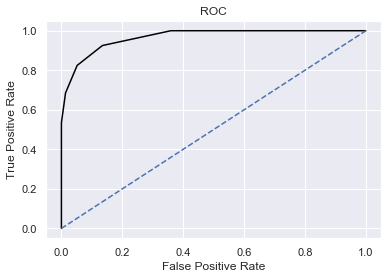

In [652]:
knn_sm_train_fpr, knn_sm_train_tpr,_=roc_curve(y_train_res,KNN_model_sm.predict_proba(X_train_res)[:,1])
plt.plot(knn_sm_train_fpr,knn_sm_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
knn_sm_train_roc=roc_auc_score(y_train_res,KNN_model_sm.predict(X_train_res))
print('knn_sm_train_roc', knn_sm_train_roc)

In [ ]:
Conclusion

In [ ]:
Accuracy on on Train data is 88%.(inc. 2%)
AUC score of train data is 96%(increased 6%)
AUC-ROC score of train data is 89%(increased 6%)
Recall(85-94) and Precision(85-94) of both class is nearly same for train data.
No imbalance issues.

# Naive Bayes Model

In [653]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [654]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

# Predicting on Training and Test dataset

In [655]:
ytrain_predict = NB_model.predict(X_train)
ytest_predict = NB_model.predict(X_test)

# Getting the Predicted Classes and Probs

In [656]:
ytest_predict_prob=NB_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.985393,0.014607
1,0.879810,0.120190
2,0.452403,0.547597
3,0.550728,0.449272
4,0.254818,0.745182


# Model Evaluation

In [657]:
# Accuracy - Training Data
nb_train_acc=NB_model.score(X_train, y_train)
nb_train_acc

0.8322399250234301

# AUC and ROC for the training data

nb_train_auc: 0.887


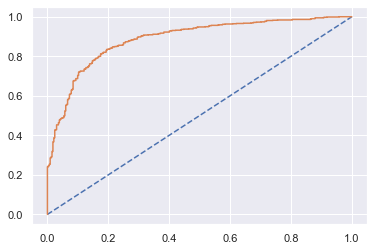

In [658]:
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
nb_train_auc = roc_auc_score(y_train, probs)
print('nb_train_auc: %.3f' % nb_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [659]:
# Accuracy - Test Data
nb_test_acc=NB_model.score(X_test, y_test)
nb_test_acc

0.8231441048034934

# AUC and ROC for the test data

nb_test_auc: 0.885


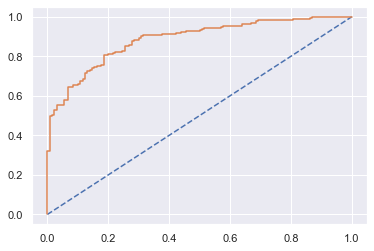

In [660]:
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
nb_test_auc = roc_auc_score(y_test, probs)
print('nb_test_auc: %.3f' % nb_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

# Confusion Matrix for the training data

In [661]:
confusion_matrix(y_train, ytrain_predict)

array([[240,  92],
       [ 87, 648]], dtype=int64)

In [662]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.80      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



In [663]:
print("Labour Vote - train data")
nb_train_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(nb_train_metrics).transpose()
nb_train_precision=round(df.loc["1"][0],2)
nb_train_recall=round(df.loc["1"][1],2)
nb_train_f1=round(df.loc["1"][2],2)
print ('nb_train_precision ',nb_train_precision)
print ('nb_train_recall ',nb_train_recall)
print ('nb_train_f1 ',nb_train_f1)

Labour Vote - train data
nb_train_precision  0.88
nb_train_recall  0.88
nb_train_f1  0.88


print("Conservative Vote - train data")
nb_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(nb_metrics).transpose()
nb_train_precision=round(df.loc["0"][0],1)
nb_train_recall=round(df.loc["0"][1],1)
nb_train_f1=round(df.loc["0"][2],1)
print ('nb_train_precision ',nb_train_precision)
print ('nb_train_recall ',nb_train_recall)
print ('nb_train_f1 ',nb_train_f1)

nb_train_auc 0.8022621096631424


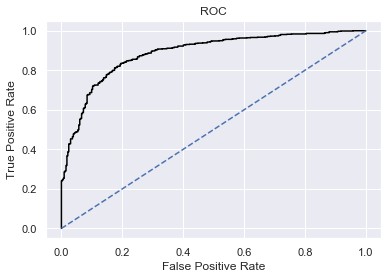

In [664]:
nb_train_fpr, nb_train_tpr,_=roc_curve(y_train,NB_model.predict_proba(X_train)[:,1])
plt.plot(nb_train_fpr,nb_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nb_train_auc=roc_auc_score(y_train,NB_model.predict(X_train))
print('nb_train_auc', nb_train_auc)

# Confusion Matrix for test data

In [665]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[ 94,  36],
       [ 45, 283]], dtype=int64)

In [666]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.86      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.82      0.82       458



In [667]:
print("Labour vote - Test data")
nb_test_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(nb_test_metrics).transpose()
nb_test_precision=round(df.loc["1"][0],2)
nb_test_recall=round(df.loc["1"][1],2)
nb_test_f1=round(df.loc["1"][2],2)
print ('nb_test_precision ',nb_test_precision)
print ('nb_test_recall ',nb_test_recall)
print ('nb_test_f1 ',nb_test_f1)

Labour vote - Test data
nb_test_precision  0.89
nb_test_recall  0.86
nb_test_f1  0.87


print("Conservative vote - Test data")
nb_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(nb_metrics).transpose()
nb_test_precision=round(df.loc["0"][0],1)
nb_test_recall=round(df.loc["0"][1],1)
nb_test_f1=round(df.loc["0"][2],1)
print ('nb_test_precision ',nb_test_precision)
print ('nb_test_recall ',nb_test_recall)
print ('nb_test_f1 ',nb_test_f1)

nb_test_roc 0.7929409005628518


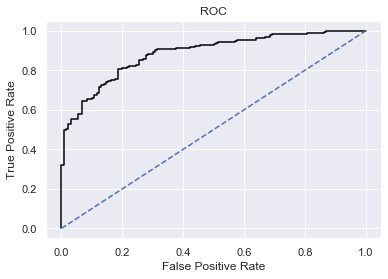

In [668]:
nb_test_fpr, nb_test_tpr,_=roc_curve(y_test,NB_model.predict_proba(X_test)[:,1])
plt.plot(nb_test_fpr,nb_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nb_test_roc=roc_auc_score(y_test,NB_model.predict(X_test))
print('nb_test_roc', nb_test_roc)

 # Conclusion

In [ ]:
Accuracy on Test data is 82% and on Train data is 83%.
AUC score of test data is 89% and train data is 89%(same)
AUC-ROC score of test data is 79% and train data is 80%.
Recall(86-89) and Precision(88%) of class 1 is nearly same for test and train data.
While the model results between training and test sets are similar, indicating no under or overfitting issues, 
overall prediction of the model is weaker in terms of predicting class 0. Imbalance problem needs to fixed.

# Model Tuning- Naive Bayes

In [346]:
from sklearn.metrics import brier_score_loss
from sklearn.calibration import CalibratedClassifierCV
sample_weight = np.random.RandomState(1).rand(y.shape[0])

# split train, test for calibration
X_train, X_test, y_train, y_test, sw_train, sw_test = \
    train_test_split(X, y, sample_weight, test_size=0.9, random_state=1)

# Gaussian Naive-Bayes with no calibration
clf = GaussianNB()
clf.fit(X_train, y_train)  # GaussianNB itself does not support sample-weights
prob_pos_clf = clf.predict_proba(X_test)[:, 1]

# Gaussian Naive-Bayes with isotonic calibration
clf_isotonic = CalibratedClassifierCV(clf, cv=2, method='isotonic')
clf_isotonic.fit(X_train, y_train, sample_weight=sw_train)
prob_pos_isotonic = clf_isotonic.predict_proba(X_test)[:, 1]

# Gaussian Naive-Bayes with sigmoid calibration
clf_sigmoid = CalibratedClassifierCV(clf, cv=2, method='sigmoid')
clf_sigmoid.fit(X_train, y_train, sample_weight=sw_train)
prob_pos_sigmoid = clf_sigmoid.predict_proba(X_test)[:, 1]

print("Brier scores: (the smaller the better)")

clf_score = brier_score_loss(y_test, prob_pos_clf, sample_weight=sw_test)
print("No calibration: %1.3f" % clf_score)

clf_isotonic_score = brier_score_loss(y_test, prob_pos_isotonic,
                                      sample_weight=sw_test)
print("With isotonic calibration: %1.3f" % clf_isotonic_score)

clf_sigmoid_score = brier_score_loss(y_test, prob_pos_sigmoid,
                                     sample_weight=sw_test)
print("With sigmoid calibration: %1.3f" % clf_sigmoid_score)


Brier scores: (the smaller the better)
No calibration: 0.138
With isotonic calibration: 0.145
With sigmoid calibration: 0.135


# Predicting on Training and Test dataset

In [669]:
ytrain_predict = clf_sigmoid.predict(X_train)
ytest_predict = clf_sigmoid.predict(X_test)

# Getting the Predicted Classes and Probs

In [670]:
ytest_predict_prob=clf_sigmoid.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.786859,0.213141
1,0.696189,0.303811
2,0.366563,0.633437
3,0.388665,0.611335
4,0.262711,0.737289


# Model Evaluation

In [672]:
# Accuracy - Training Data
grid_nb_train_acc=clf_sigmoid.score(X_train, y_train)
grid_nb_train_acc

0.8125585754451734

# AUC and ROC for the training data

grid_nb_train_auc: 0.877


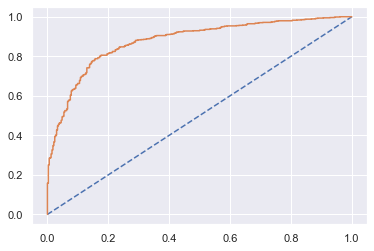

In [673]:
# predict probabilities
probs = clf_sigmoid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
grid_nb_train_auc = roc_auc_score(y_train, probs)
print('grid_nb_train_auc: %.3f' % grid_nb_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [674]:
# Accuracy - Test Data
grid_nb_test_acc=clf_sigmoid.score(X_test, y_test)
grid_nb_test_acc

0.8209606986899564

In [ ]:
#AUC and ROC for the test data

grid_nb_test_auc: 0.888


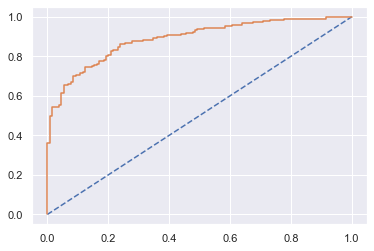

In [675]:
# predict probabilities
probs = clf_sigmoid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
grid_nb_test_auc = roc_auc_score(y_test, probs)
print('grid_nb_test_auc: %.3f' % grid_nb_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

# Confusion Matrix for the training data

In [676]:
confusion_matrix(y_train, ytrain_predict)

array([[193, 139],
       [ 61, 674]], dtype=int64)

In [677]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.76      0.58      0.66       332
           1       0.83      0.92      0.87       735

    accuracy                           0.81      1067
   macro avg       0.79      0.75      0.76      1067
weighted avg       0.81      0.81      0.80      1067



In [678]:
print("Labour Vote - train data")
grid_nb_train_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(grid_nb_train_metrics).transpose()
grid_nb_train_precision=round(df.loc["1"][0],2)
grid_nb_train_recall=round(df.loc["1"][1],2)
grid_nb_train_f1=round(df.loc["1"][2],2)
print ('grid_nb_train_precision ',grid_nb_train_precision)
print ('grid_nb_train_recall ',grid_nb_train_recall)
print ('grid_nb_train_f1 ',grid_nb_train_f1)

Labour Vote - train data
grid_nb_train_precision  0.83
grid_nb_train_recall  0.92
grid_nb_train_f1  0.87


grid_nb_train_auc 0.8007089582821081


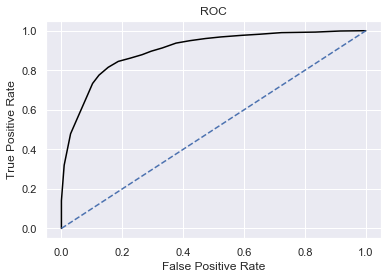

In [679]:
grid_nb_train_fpr, grid_train_train_tpr,_=roc_curve(y_train,best_model.predict_proba(X_train)[:,1])
plt.plot(grid_nb_train_fpr,grid_train_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
grid_nb_train_auc=roc_auc_score(y_train,best_model.predict(X_train))
print('grid_nb_train_auc', grid_nb_train_auc)

# Confusion Matrix for test data

In [680]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[ 80,  50],
       [ 32, 296]], dtype=int64)

In [681]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.71      0.62      0.66       130
           1       0.86      0.90      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.76      0.77       458
weighted avg       0.82      0.82      0.82       458



In [682]:
print("Labour vote - Test data")
grid_nb_test_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(grid_nb_test_metrics).transpose()
grid_nb_test_precision=round(df.loc["1"][0],2)
grid_nb_test_recall=round(df.loc["1"][1],2)
grid_nb_test_f1=round(df.loc["1"][2],2)
print ('grid_nb_test_precision ',grid_nb_test_precision)
print ('grid_nb_test_recall ',grid_nb_test_recall)
print ('grid_nb_test_f1 ',grid_nb_test_f1)

Labour vote - Test data
grid_nb_test_precision  0.86
grid_nb_test_recall  0.9
grid_nb_test_f1  0.88


grid_nb_test_roc 0.7589118198874296


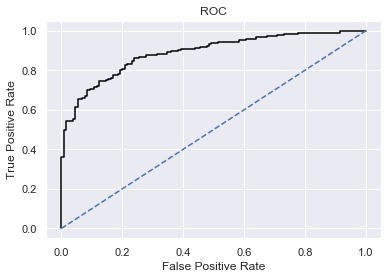

In [683]:
grid_nb_test_fpr, grid_nb_test_tpr,_=roc_curve(y_test,clf_sigmoid.predict_proba(X_test)[:,1])
plt.plot(grid_nb_test_fpr,grid_nb_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
grid_nb_test_roc=roc_auc_score(y_test,clf_sigmoid.predict(X_test))
print('grid_nb_test_roc', grid_nb_test_roc)

In [ ]:
Conclusion - Model tuning has no impact...

In [ ]:
Accuracy on Test data is 81% and on Train data is 84%(inc/dec)
AUC score of test data is 89% and train data is 89%(same)
AUC-ROC score of test data is 75% (4% dec.)and train data is 80%.
Recall(91)and Precision(86-93) of class 1 is nearly same for test and train data.
While the model results between training and test sets are similar, indicating no under or overfitting issues, 
overall prediction of the model is weaker in terms of predicting class 0. Imbalance problem needs to fixed.

In [ ]:
# NB model with SMOTE

In [684]:
NB_model_sm=GaussianNB()
NB_model_sm.fit(X_train_res,y_train_res)

GaussianNB()

# Predicting on Training and Test dataset

In [685]:
ytrain_predict_res = NB_model_sm.predict(X_train_res)
#ytest_predict = model.predict(X_test_res)

# Model Evaluation

In [686]:
# Accuracy - Training Data
nb_sm_train_acc=NB_model_sm.score(X_train_res, y_train_res)
nb_sm_train_acc

0.826530612244898

# AUC and ROC for the training data

nb_sm_train_auc: 0.897


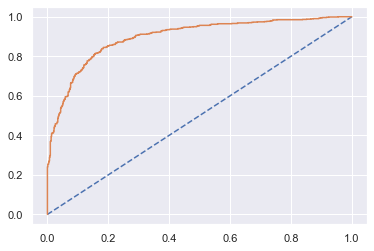

In [687]:
# predict probabilities
probs = NB_model_sm.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
nb_sm_train_auc = roc_auc_score(y_train_res, probs)
print('nb_sm_train_auc: %.3f' % nb_sm_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

# Confusion Matrix for the training data

In [688]:
confusion_matrix(y_train_res, ytrain_predict_res)

array([[606, 129],
       [126, 609]], dtype=int64)

In [689]:
print(classification_report(y_train_res, ytrain_predict_res))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       735
           1       0.83      0.83      0.83       735

    accuracy                           0.83      1470
   macro avg       0.83      0.83      0.83      1470
weighted avg       0.83      0.83      0.83      1470



In [690]:
print("Labour Vote - train data")
nb_sm_train_metrics=classification_report(y_train_res, ytrain_predict_res,output_dict=True)
df=pd.DataFrame(nb_sm_train_metrics).transpose()
nb_sm_train_precision=round(df.loc["1"][0],2)
nb_sm_train_recall=round(df.loc["1"][1],2)
nb_sm_train_f1=round(df.loc["1"][2],2)
print ('nb_sm_train_precision ',nb_sm_train_precision)
print ('nb_sm_train_recall ',nb_sm_train_recall)
print ('nb_sm_train_f1 ',nb_sm_train_f1)

Labour Vote - train data
nb_sm_train_precision  0.83
nb_sm_train_recall  0.83
nb_sm_train_f1  0.83


print("Conservative Vote - train data")
lgr_metrics=classification_report(y_train_res, ytrain_predict_res,output_dict=True)
df=pd.DataFrame(lgr_metrics).transpose()
lgr_train_precision=round(df.loc["0"][0],2)
lgr_train_recall=round(df.loc["0"][1],2)
lgr_train_f1=round(df.loc["0"][2],2)
print ('lgr_train_precision ',lgr_train_precision)
print ('lgr_train_recall ',lgr_train_recall)
print ('lgr_train_f1 ',lgr_train_f1)

nb_sm_train_roc 0.8265306122448981


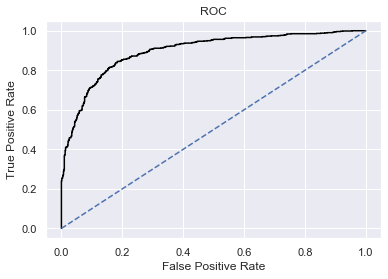

In [691]:
nb_sm_train_fpr, nb_sm_train_tpr,_=roc_curve(y_train_res,NB_model_sm.predict_proba(X_train_res)[:,1])
plt.plot(nb_sm_train_fpr,nb_sm_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nb_sm_train_roc=roc_auc_score(y_train_res,NB_model_sm.predict(X_train_res))
print('nb_sm_train_roc', nb_sm_train_roc)

In [ ]:
Conclusion

In [ ]:
Accuracy on on Train data is 82%.(same)
AUC score of train data is 90%(increased 1%)
AUC-ROC score of train data is 82%(increased 2%)
Recall(82-84) and Precision(81-83) of both class is nearly same for train data.
No imbalance issues.

# SVM Model

In [692]:
from sklearn import svm

SVM_model= svm.SVC(random_state=1,probability=True)
SVM_model.fit(X_train, y_train)

SVC(probability=True, random_state=1)

# Predicting on Training and Test dataset

In [693]:
ytrain_predict = SVM_model.predict(X_train)
ytest_predict = SVM_model.predict(X_test)

# Getting the Predicted Classes and Probs

In [694]:
ytest_predict_prob=SVM_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.828963,0.171037
1,0.863790,0.136210
2,0.188280,0.811720
3,0.462736,0.537264
4,0.144079,0.855921


# Model Evaluation

In [695]:
# Accuracy - Training Data
svm_train_acc=SVM_model.score(X_train, y_train)
svm_train_acc

0.8631677600749765

# AUC and ROC for the training data

svm_train_auc: 0.913


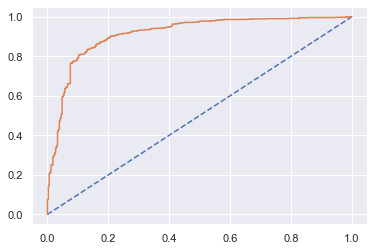

In [696]:
# predict probabilities
probs = SVM_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
svm_train_auc = roc_auc_score(y_train, probs)
print('svm_train_auc: %.3f' % svm_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [697]:
# Accuracy - Test Data
svm_test_acc=SVM_model.score(X_test, y_test)
svm_test_acc

0.8253275109170306

In [ ]:
#AUC and ROC for the test data

svm_test_auc: 0.898


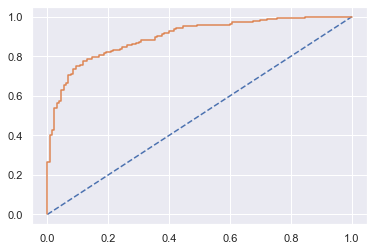

In [698]:
# predict probabilities
probs = SVM_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
svm_test_auc = roc_auc_score(y_test, probs)
print('svm_test_auc: %.3f' % svm_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

# Confusion Matrix for the training data

In [699]:
confusion_matrix(y_train, ytrain_predict)

array([[239,  93],
       [ 53, 682]], dtype=int64)

In [700]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77       332
           1       0.88      0.93      0.90       735

    accuracy                           0.86      1067
   macro avg       0.85      0.82      0.83      1067
weighted avg       0.86      0.86      0.86      1067



In [701]:
print("Labour Vote - train data")
svm_train_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(svm_train_metrics).transpose()
svm_train_precision=round(df.loc["1"][0],2)
svm_train_recall=round(df.loc["1"][1],2)
svm_train_f1=round(df.loc["1"][2],2)
print ('svm_train_precision ',svm_train_precision)
print ('svm_train_recall ',svm_train_recall)
print ('svm_train_f1 ',svm_train_f1)

Labour Vote - train data
svm_train_precision  0.88
svm_train_recall  0.93
svm_train_f1  0.9


print("Conservative Vote - train data")
svm_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(svm_metrics).transpose()
svm_train_precision=round(df.loc["0"][0],1)
svm_train_recall=round(df.loc["0"][1],1)
svm_train_f1=round(df.loc["0"][2],1)
print ('svm_train_precision ',svm_train_precision)
print ('svm_train_recall ',svm_train_recall)
print ('svm_train_f1 ',svm_train_f1)

svm_train_auc 0.8238853372674371


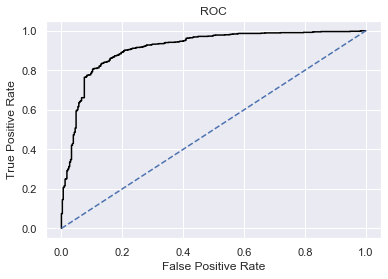

In [702]:
svm_train_fpr, svm_train_tpr,_=roc_curve(y_train,SVM_model.predict_proba(X_train)[:,1])
plt.plot(svm_train_fpr,svm_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
svm_train_auc=roc_auc_score(y_train,SVM_model.predict(X_train))
print('svm_train_auc', svm_train_auc)

# Confusion Matrix for test data

In [703]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[ 83,  47],
       [ 33, 295]], dtype=int64)

In [704]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.72      0.64      0.67       130
           1       0.86      0.90      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.77      0.78       458
weighted avg       0.82      0.83      0.82       458



In [705]:
print("Labour vote - Test data")
svm_test_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(svm_test_metrics).transpose()
svm_test_precision=round(df.loc["1"][0],2)
svm_test_recall=round(df.loc["1"][1],2)
svm_test_f1=round(df.loc["1"][2],2)
print ('svm_test_precision ',svm_test_precision)
print ('svm_test_recall ',svm_test_recall)
print ('svm_test_f1 ',svm_test_f1)

Labour vote - Test data
svm_test_precision  0.86
svm_test_recall  0.9
svm_test_f1  0.88


print("Conservative vote - Test data")
svm_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(svm_metrics).transpose()
svm_test_precision=round(df.loc["0"][0],1)
svm_test_recall=round(df.loc["0"][1],1)
svm_test_f1=round(df.loc["0"][2],1)
print ('svm_test_precision ',svm_test_precision)
print ('svm_test_recall ',svm_test_recall)
print ('svm_test_f1 ',svm_test_f1)

svm_test_roc 0.7689258911819887


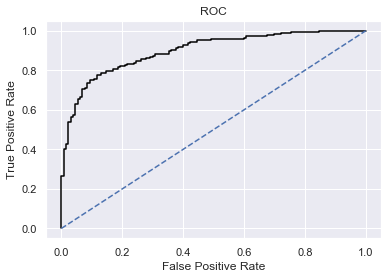

In [706]:
svm_test_fpr, svm_test_tpr,_=roc_curve(y_test,SVM_model.predict_proba(X_test)[:,1])
plt.plot(svm_test_fpr,svm_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
svm_test_roc=roc_auc_score(y_test,SVM_model.predict(X_test))
print('svm_test_roc', svm_test_roc)

In [ ]:
Conclusion

In [ ]:
Accuracy on Test data is 81% and on Train data is 89%.
AUC score of test data is 94% and train data is 94%(same)
AUC-ROC score of test data is 75% and train data is 85%.
Recall(92-97) and Precision(83-88) of class 1 is nearly same for test and train data.
While the model results between training and test sets are similar, indicating no under or overfitting issues, 
overall prediction of the model is weaker in terms of predicting class 0. Imbalance problem needs to fixed.

In [ ]:
#Model Tuning SVM model

In [710]:
from sklearn.svm import SVC
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid_svm = GridSearchCV(SVC(probability=True), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid_svm.fit(X_train, y_train) 
# print best parameter after tuning 
print(grid_svm.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_svm.best_estimator_) 

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.785, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.846, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.831, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.864, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.803, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.808, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.836, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.831, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.864, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.803, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.831, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.864, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.808, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.813, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.855, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.840, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.864, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.859, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.817, total=   0.1s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.813, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.850, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.840, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.859, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.808, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.817, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ... C=100, gamma=0.001, kernel=linear, score=0.813, total=   0.1s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ... C=100, gamma=0.001, kernel=linear, score=0.850, total=   0.1s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ... C=100, gamma=0.001, kernel=linear, score=0.840, total=   0.2s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ... C=100, gamma=0.001, kernel=linear, score=0.859, total=   0.2s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ... C=100, gamma=0.001, kernel=linear, score=0.808, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.743, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .

[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.812, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.813, total=   1.3s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.850, total=   1.2s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.840, total=   1.2s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.859, total=   1.1s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.808, total=   0.9s
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, gamma=0.01, probability=True)


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   44.8s finished


# Predicting on Training and Test dataset

In [711]:
ytrain_predict = grid_svm.predict(X_train)
ytest_predict = grid_svm.predict(X_test)

# Getting the Predicted Classes and Probs

In [712]:
ytest_predict_prob=grid_svm.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.913735,0.086265
1,0.700258,0.299742
2,0.325328,0.674672
3,0.486220,0.513780
4,0.164810,0.835190


# Model Evaluation

In [713]:
# Accuracy - Training Data
grid_svm_train_acc=grid_svm.score(X_train, y_train)
grid_svm_train_acc

0.8416119962511716

# AUC and ROC for the training data

grid_svm_train_auc: 0.889


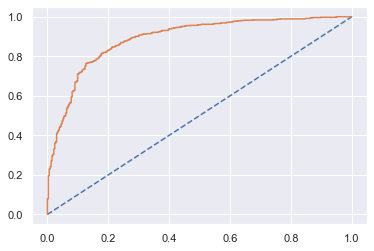

In [714]:
# predict probabilities
probs = grid_svm.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
grid_svm_train_auc = roc_auc_score(y_train, probs)
print('grid_svm_train_auc: %.3f' % grid_svm_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [715]:
# Accuracy - Test Data
grid_svm_test_acc=grid_svm.score(X_test, y_test)
grid_svm_test_acc

0.8253275109170306

In [ ]:
#AUC and ROC for the test data

grid_svm_test_auc: 0.880


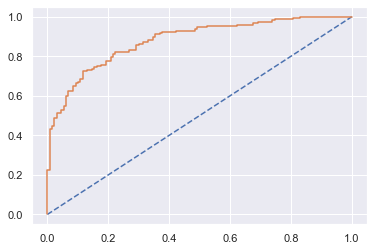

In [716]:
# predict probabilities
probs = grid_svm.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
grid_svm_test_auc = roc_auc_score(y_test, probs)
print('grid_svm_test_auc: %.3f' % grid_svm_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

# Confusion Matrix for the training data

In [717]:
confusion_matrix(y_train, ytrain_predict)

array([[231, 101],
       [ 68, 667]], dtype=int64)

In [718]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.77      0.70      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [719]:
print("Labour Vote - train data")
grid_svm_train_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(grid_svm_train_metrics).transpose()
grid_svm_train_precision=round(df.loc["1"][0],2)
grid_svm_train_recall=round(df.loc["1"][1],2)
grid_svm_train_f1=round(df.loc["1"][2],2)
print ('grid_svm_train_precision ',grid_svm_train_precision)
print ('grid_svm_train_recall ',grid_svm_train_recall)
print ('grid_svm_train_f1 ',grid_svm_train_f1)

Labour Vote - train data
grid_svm_train_precision  0.87
grid_svm_train_recall  0.91
grid_svm_train_f1  0.89


grid_svm_train_roc 0.8007089582821081


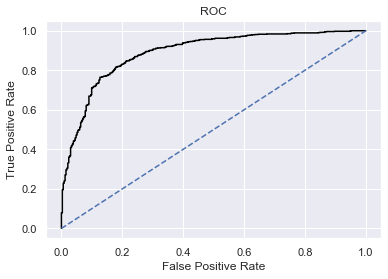

In [720]:
grid_svm_train_fpr, grid_svm_train_tpr,_=roc_curve(y_train,grid_svm.predict_proba(X_train)[:,1])
plt.plot(grid_svm_train_fpr,grid_svm_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
grid_svm_train_roc=roc_auc_score(y_train,best_model.predict(X_train))
print('grid_svm_train_roc', grid_svm_train_roc)

# Confusion Matrix for test data

In [721]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[ 85,  45],
       [ 35, 293]], dtype=int64)

In [722]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.71      0.65      0.68       130
           1       0.87      0.89      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.77      0.78       458
weighted avg       0.82      0.83      0.82       458



In [723]:
print("Labour vote - Test data")
grid_svm_test_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(grid_svm_test_metrics).transpose()
grid_svm_test_precision=round(df.loc["1"][0],2)
grid_svm_test_recall=round(df.loc["1"][1],2)
grid_svm_test_f1=round(df.loc["1"][2],2)
print ('grid_svm_test_precision ',grid_svm_test_precision)
print ('grid_svm_test_recall ',grid_svm_test_recall)
print ('grid_svm_test_f1 ',grid_svm_test_f1)

Labour vote - Test data
grid_svm_test_precision  0.87
grid_svm_test_recall  0.89
grid_svm_test_f1  0.88


grid_svm_test_roc 0.7735694183864915


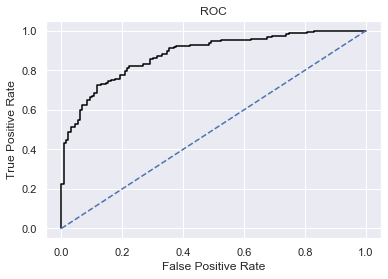

In [724]:
grid_svm_test_fpr, grid_svm_test_tpr,_=roc_curve(y_test,grid_svm.predict_proba(X_test)[:,1])
plt.plot(grid_svm_test_fpr,grid_svm_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
grid_svm_test_roc=roc_auc_score(y_test,grid_svm.predict(X_test))
print('grid_svm_test_roc', grid_svm_test_roc)

In [ ]:
Conclusion - Model tuning has no impact...

In [ ]:
Accuracy on Test data is 82% and on Train data is 86%(inc/dec)
AUC score of test data is 89% and train data is 89%(same)
AUC-ROC score of test data is 77% and train data is 83%.
Recall(89-93)and Precision(86-87) of class 1 is nearly same for test and train data.
While the model results between training and test sets are similar, indicating no under or overfitting issues, 
overall prediction of the model is weaker in terms of predicting class 0. Imbalance problem needs to fixed.

In [ ]:
# SVM with SMOTE

In [725]:
SVM_model_sm= svm.SVC(random_state=1,probability=True)
SVM_model_sm.fit(X_train_res, y_train_res)

SVC(probability=True, random_state=1)

# Predicting on Training and Test dataset

In [726]:
ytrain_predict_res = SVM_model_sm.predict(X_train_res)
#ytest_predict = model.predict(X_test_res)

# Model Evaluation

In [727]:
# Accuracy - Training Data
svm_sm_train_acc=SVM_model_sm.score(X_train_res, y_train_res)
svm_sm_train_acc

0.8646258503401361

# AUC and ROC for the training data

svm_sm_train_auc: 0.932


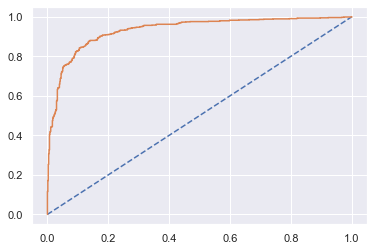

In [728]:
# predict probabilities
probs = SVM_model_sm.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
svm_sm_train_auc = roc_auc_score(y_train_res, probs)
print('svm_sm_train_auc: %.3f' % svm_sm_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

# Confusion Matrix for the training data

In [729]:
confusion_matrix(y_train_res, ytrain_predict_res)

array([[649,  86],
       [113, 622]], dtype=int64)

In [730]:
print(classification_report(y_train_res, ytrain_predict_res))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       735
           1       0.88      0.85      0.86       735

    accuracy                           0.86      1470
   macro avg       0.87      0.86      0.86      1470
weighted avg       0.87      0.86      0.86      1470



In [731]:
print("Labour Vote - train data")
svm_sm_train_metrics=classification_report(y_train_res, ytrain_predict_res,output_dict=True)
df=pd.DataFrame(svm_sm_train_metrics).transpose()
svm_sm_train_precision=round(df.loc["1"][0],2)
svm_sm_train_recall=round(df.loc["1"][1],2)
svm_sm_train_f1=round(df.loc["1"][2],2)
print ('svm_sm_train_precision ',svm_sm_train_precision)
print ('svm_sm_train_recall ',svm_sm_train_recall)
print ('svm_sm_train_f1 ',svm_sm_train_f1)

Labour Vote - train data
svm_sm_train_precision  0.88
svm_sm_train_recall  0.85
svm_sm_train_f1  0.86


print("Conservative Vote - train data")
lgr_metrics=classification_report(y_train_res, ytrain_predict_res,output_dict=True)
df=pd.DataFrame(lgr_metrics).transpose()
lgr_train_precision=round(df.loc["0"][0],2)
lgr_train_recall=round(df.loc["0"][1],2)
lgr_train_f1=round(df.loc["0"][2],2)
print ('lgr_train_precision ',lgr_train_precision)
print ('lgr_train_recall ',lgr_train_recall)
print ('lgr_train_f1 ',lgr_train_f1)

svm_sm_train_roc 0.8646258503401361


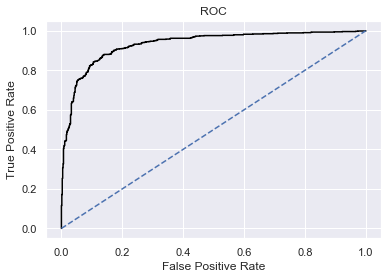

In [732]:
svm_sm_train_fpr, svm_sm_train_tpr,_=roc_curve(y_train_res,SVM_model_sm.predict_proba(X_train_res)[:,1])
plt.plot(svm_sm_train_fpr,svm_sm_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
svm_sm_train_roc=roc_auc_score(y_train_res,SVM_model_sm.predict(X_train_res))
print('svm_sm_train_roc', svm_sm_train_roc)

In [ ]:
Conclusion

In [ ]:
Accuracy on on Train data is 86%.(3% dec)
AUC score of train data is 93%(dec 1%)
AUC-ROC score of train data is 86%(increased 1%)
Recall(86-87) and Precision(86-87) of both class is nearly same for train data.
No imbalance issues.

# Bagging - Random Forest classifier

In [733]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
Bagging_model=BaggingClassifier(base_estimator=RF_model,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1),
                  n_estimators=100, random_state=1)

# Predicting on Training and Test dataset

In [734]:
ytrain_predict = Bagging_model.predict(X_train)
ytest_predict = Bagging_model.predict(X_test)

# Getting the Predicted Classes and Probs

In [735]:
ytest_predict_prob=Bagging_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.6951,0.3049
1,0.7910,0.2090
2,0.2779,0.7221
3,0.3742,0.6258
4,0.2212,0.7788


# Model Evaluation

In [736]:
# Accuracy - Training Data
bag_train_acc=Bagging_model.score(X_train, y_train)
bag_train_acc

0.9653233364573571

# AUC and ROC for the training data

bag_train_auc: 0.997


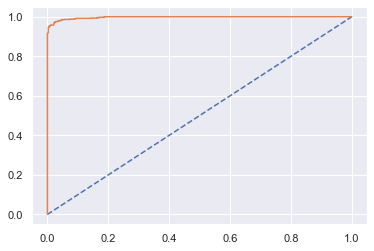

In [737]:
# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bag_train_auc = roc_auc_score(y_train, probs)
print('bag_train_auc: %.3f' % bag_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [738]:
# Accuracy - Test Data
bag_test_acc=Bagging_model.score(X_test, y_test)
bag_test_acc

0.8362445414847162

In [ ]:
#AUC and ROC for the test data

bag_test_auc: 0.898


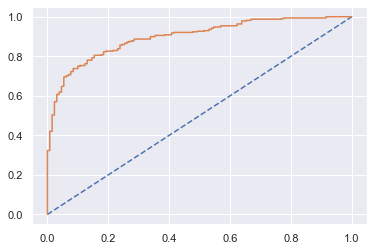

In [739]:
# predict probabilities
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bag_test_auc = roc_auc_score(y_test, probs)
print('bag_test_auc: %.3f' % bag_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

# Confusion Matrix for the training data

In [740]:
confusion_matrix(y_train, ytrain_predict)

array([[304,  28],
       [  9, 726]], dtype=int64)

In [741]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       332
           1       0.96      0.99      0.98       735

    accuracy                           0.97      1067
   macro avg       0.97      0.95      0.96      1067
weighted avg       0.97      0.97      0.97      1067



In [742]:
print("Labour Vote - train data")
bag_train_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(bag_train_metrics).transpose()
bag_train_precision=round(df.loc["1"][0],2)
bag_train_recall=round(df.loc["1"][1],2)
bag_train_f1=round(df.loc["1"][2],2)
print ('bag_train_precision ',bag_train_precision)
print ('bag_train_recall ',bag_train_recall)
print ('bag_train_f1 ',bag_train_f1)

Labour Vote - train data
bag_train_precision  0.96
bag_train_recall  0.99
bag_train_f1  0.98


print("Conservative Vote - train data")
bag_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(bag_metrics).transpose()
bag_train_precision=round(df.loc["0"][0],1)
bag_train_recall=round(df.loc["0"][1],1)
bag_train_f1=round(df.loc["0"][2],1)
print ('bag_train_precision ',bag_train_precision)
print ('bag_train_recall ',bag_train_recall)
print ('bag_train_f1 ',bag_train_f1)

Area under Curve Train data 0.951708876321613


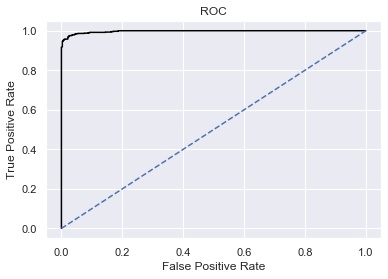

In [743]:
bag_train_fpr, bag_train_tpr,_=roc_curve(y_train,Bagging_model.predict_proba(X_train)[:,1])
plt.plot(bag_train_fpr,bag_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
bag_train_auc=roc_auc_score(y_train,Bagging_model.predict(X_train))
print('Area under Curve Train data', bag_train_auc)

# Confusion Matrix for test data

In [744]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[ 92,  38],
       [ 37, 291]], dtype=int64)

In [745]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       130
           1       0.88      0.89      0.89       328

    accuracy                           0.84       458
   macro avg       0.80      0.80      0.80       458
weighted avg       0.84      0.84      0.84       458



In [746]:
print("Labour vote - Test data")
bag_test_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(bag_test_metrics).transpose()
bag_test_precision=round(df.loc["1"][0],2)
bag_test_recall=round(df.loc["1"][1],2)
bag_test_f1=round(df.loc["1"][2],2)
print ('bag_test_precision ',bag_test_precision)
print ('bag_test_recall ',bag_test_recall)
print ('bag_test_f1 ',bag_test_f1)

Labour vote - Test data
bag_test_precision  0.88
bag_test_recall  0.89
bag_test_f1  0.89


print("Conservative vote - Test data")
bag_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(bag_metrics).transpose()
bag_test_precision=round(df.loc["0"][0],1)
bag_test_recall=round(df.loc["0"][1],1)
bag_test_f1=round(df.loc["0"][2],1)
print ('bag_test_precision ',bag_test_precision)
print ('bag_test_recall ',bag_test_recall)
print ('bag_test_f1 ',bag_test_f1)

Area under Curve -Test data 0.7974437148217635


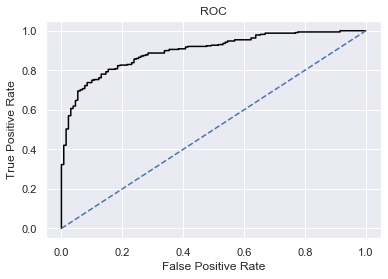

In [747]:
bag_test_fpr, bag_test_tpr,_=roc_curve(y_test,Bagging_model.predict_proba(X_test)[:,1])
plt.plot(bag_test_fpr,bag_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
bag_test_auc=roc_auc_score(y_test,Bagging_model.predict(X_test))
print('Area under Curve -Test data', bag_test_auc)

In [ ]:
Conclusion

In [ ]:
Accuracy on Test data is 81% and on Train data is 96%.
AUC score of test data is 99% and train data is 99%(same)
AUC-ROC score of test data is 73% and train data is 95%.
Recall(91-99) and Precision(83-95) of class 1 is nearly same for test and train data.
While the model results between training and test sets are not similar, indicating overfitting issues, 
overall prediction of the model is weaker in terms of predicting class 0. Imbalance problem needs to fixed.

In [ ]:
# Model Tuning - Bagging - RandomForestClassifier

In [748]:
param_grid = {
    'max_depth': [7],
    'max_features': [8],
    'min_samples_leaf': [5,10],
    'min_samples_split': [50,100],
    'n_estimators': [100]
}

rfcl = RandomForestClassifier()

grid_search_rf = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [749]:
Bagging_model_grid=BaggingClassifier(base_estimator=grid_search_rf,random_state=1)


In [750]:
grid_search_rf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7], 'max_features': [8],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [50, 100],
                         'n_estimators': [100]})

# Predicting on Training and Test dataset

In [751]:
ytrain_predict = grid_search_rf.predict(X_train)
ytest_predict = grid_search_rf.predict(X_test)

# Getting the Predicted Classes and Probs

In [752]:
ytest_predict_prob=grid_search_rf.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.893433,0.106567
1,0.835408,0.164592
2,0.106721,0.893279
3,0.212139,0.787861
4,0.323311,0.676689


# Model Evaluation

In [753]:
# Accuracy - Training Data
grid_bag_train_acc=grid_search_rf.score(X_train, y_train)
grid_bag_train_acc

0.8416119962511716

# AUC and ROC for the training data

grid_bag_train_auc: 0.915


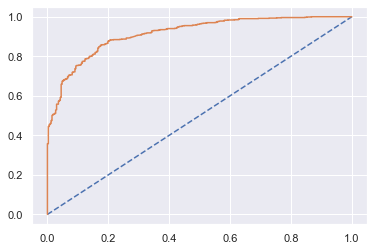

In [754]:
# predict probabilities
probs = grid_search_rf.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
grid_bag_train_auc = roc_auc_score(y_train, probs)
print('grid_bag_train_auc: %.3f' % grid_bag_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [755]:
# Accuracy - Test Data
grid_bag_test_acc=grid_search_rf.score(X_test, y_test)
grid_bag_test_acc

0.8078602620087336

In [ ]:
#AUC and ROC for the test data

grid_bag_test_auc: 0.889


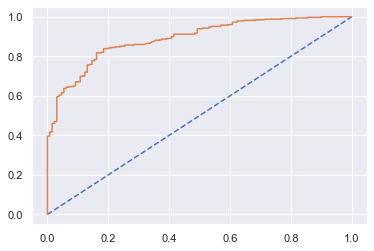

In [756]:
# predict probabilities
probs = grid_search_rf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
grid_bag_test_auc = roc_auc_score(y_test, probs)
print('grid_bag_test_auc: %.3f' % grid_bag_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

# Confusion Matrix for the training data

In [757]:
confusion_matrix(y_train, ytrain_predict)

array([[224, 108],
       [ 61, 674]], dtype=int64)

In [758]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.79      0.67      0.73       332
           1       0.86      0.92      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [759]:
print("Labour Vote - train data")
grid_bag_train_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(grid_bag_train_metrics).transpose()
grid_bag_train_precision=round(df.loc["1"][0],2)
grid_bag_train_recall=round(df.loc["1"][1],2)
grid_bag_train_f1=round(df.loc["1"][2],2)
print ('grid_bag_train_precision ',grid_bag_train_precision)
print ('grid_bag_train_recall ',grid_bag_train_recall)
print ('grid_bag_train_f1 ',grid_bag_train_f1)

Labour Vote - train data
grid_bag_train_precision  0.86
grid_bag_train_recall  0.92
grid_bag_train_f1  0.89


print("Conservative Vote - train data")
bag_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(bag_metrics).transpose()
bag_train_precision=round(df.loc["0"][0],1)
bag_train_recall=round(df.loc["0"][1],1)
bag_train_f1=round(df.loc["0"][2],1)
print ('bag_train_precision ',bag_train_precision)
print ('bag_train_recall ',bag_train_recall)
print ('bag_train_f1 ',bag_train_f1)

grid_bag_train_roc 0.7958527989509057


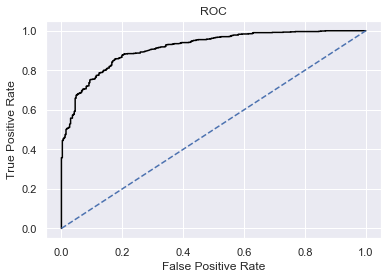

In [761]:
grid_bag_train_fpr, grid_bag_train_tpr,_=roc_curve(y_train,grid_search_rf.predict_proba(X_train)[:,1])
plt.plot(grid_bag_train_fpr,grid_bag_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
grid_bag_train_roc=roc_auc_score(y_train,grid_search_rf.predict(X_train))
print('grid_bag_train_roc', grid_bag_train_roc)

# Confusion Matrix for test data

In [762]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[ 79,  51],
       [ 37, 291]], dtype=int64)

In [763]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.68      0.61      0.64       130
           1       0.85      0.89      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.75      0.76       458
weighted avg       0.80      0.81      0.80       458



In [764]:
print("Labour vote - Test data")
grid_bag_test_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(grid_bag_test_metrics).transpose()
grid_bag_test_precision=round(df.loc["1"][0],2)
grid_bag_test_recall=round(df.loc["1"][1],2)
grid_bag_test_f1=round(df.loc["1"][2],2)
print ('grid_bag_test_precision ',grid_bag_test_precision)
print ('grid_bag_test_recall ',grid_bag_test_recall)
print ('grid_bag_test_f1 ',grid_bag_test_f1)

Labour vote - Test data
grid_bag_test_precision  0.85
grid_bag_test_recall  0.89
grid_bag_test_f1  0.87


print("Conservative vote - Test data")
bag_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(bag_metrics).transpose()
bag_test_precision=round(df.loc["0"][0],1)
bag_test_recall=round(df.loc["0"][1],1)
bag_test_f1=round(df.loc["0"][2],1)
print ('bag_test_precision ',bag_test_precision)
print ('bag_test_recall ',bag_test_recall)
print ('bag_test_f1 ',bag_test_f1)

grid_bag_test_roc 0.7474437148217636


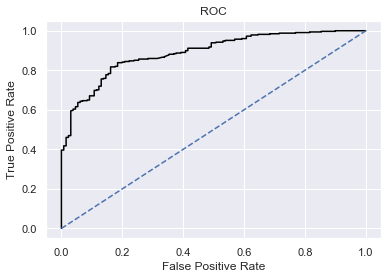

In [765]:
grid_bag_test_fpr, grid_bag_test_tpr,_=roc_curve(y_test,grid_search_rf.predict_proba(X_test)[:,1])
plt.plot(grid_bag_test_fpr,grid_bag_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
grid_bag_test_roc=roc_auc_score(y_test,grid_search_rf.predict(X_test))
print('grid_bag_test_roc', grid_bag_test_roc)

In [ ]:
Conclusion

In [ ]:
Accuracy on Test data is 78% and on Train data is 84%.
AUC score of test data is 90% and train data is 90%(same)
AUC-ROC score of test data is 69% and train data is 80%.
Recall(70-80) and Precision(84-86) of class 1 is nearly same for test and train data.
While the model results between training and test sets are not similar, indicating overfitting issues, 
overall prediction of the model is weaker in terms of predicting class 0. Imbalance problem needs to fixed.

In [ ]:
# SMOTE- Bagging - RandomForestClassifier

In [766]:
RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
Bagging_model_sm=BaggingClassifier(base_estimator=RF_model,n_estimators=100,random_state=1)
Bagging_model_sm.fit(X_train_res,y_train_res)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1),
                  n_estimators=100, random_state=1)

# Predicting on Training and Test dataset

In [767]:
ytrain_predict_res = Bagging_model_sm.predict(X_train_res)
#ytest_predict = model.predict(X_test_res)

# Model Evaluation

In [768]:
# Accuracy - Training Data
bag_sm_train_acc=Bagging_model_sm.score(X_train_res, y_train_res)
bag_sm_train_acc

0.9802721088435374

# AUC and ROC for the training data

bag_sm_train_auc: 0.999


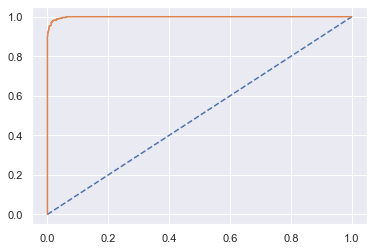

In [769]:
# predict probabilities
probs = Bagging_model_sm.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bag_sm_train_auc = roc_auc_score(y_train_res, probs)
print('bag_sm_train_auc: %.3f' % bag_sm_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

# Confusion Matrix for the training data

In [770]:
confusion_matrix(y_train_res, ytrain_predict_res)

array([[720,  15],
       [ 14, 721]], dtype=int64)

In [771]:
print(classification_report(y_train_res, ytrain_predict_res))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       735
           1       0.98      0.98      0.98       735

    accuracy                           0.98      1470
   macro avg       0.98      0.98      0.98      1470
weighted avg       0.98      0.98      0.98      1470



In [772]:
print("Labour Vote - train data")
bag_sm_train_metrics=classification_report(y_train_res, ytrain_predict_res,output_dict=True)
df=pd.DataFrame(bag_sm_train_metrics).transpose()
bag_sm_train_precision=round(df.loc["1"][0],2)
bag_sm_train_recall=round(df.loc["1"][1],2)
bag_sm_train_f1=round(df.loc["1"][2],2)
print ('bag_sm_train_precision ',bag_sm_train_precision)
print ('bag_sm_train_recall ',bag_sm_train_recall)
print ('bag_sm_train_f1 ',bag_sm_train_f1)

Labour Vote - train data
bag_sm_train_precision  0.98
bag_sm_train_recall  0.98
bag_sm_train_f1  0.98


print("Conservative Vote - train data")
lgr_metrics=classification_report(y_train_res, ytrain_predict_res,output_dict=True)
df=pd.DataFrame(lgr_metrics).transpose()
lgr_train_precision=round(df.loc["0"][0],2)
lgr_train_recall=round(df.loc["0"][1],2)
lgr_train_f1=round(df.loc["0"][2],2)
print ('lgr_train_precision ',lgr_train_precision)
print ('lgr_train_recall ',lgr_train_recall)
print ('lgr_train_f1 ',lgr_train_f1)

Area under Curve Train data 0.9802721088435374


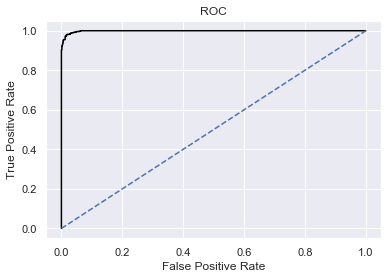

In [773]:
bag_sm_train_fpr, bag_sm_train_tpr,_=roc_curve(y_train_res,Bagging_model_sm.predict_proba(X_train_res)[:,1])
plt.plot(bag_sm_train_fpr,bag_sm_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
bag_sm_train_roc=roc_auc_score(y_train_res,Bagging_model_sm.predict(X_train_res))
print('Area under Curve Train data', bag_sm_train_roc)

In [ ]:
Conclusion

In [ ]:
Accuracy on on Train data is 98%.(2% inc)
AUC score of train data is 99%(same)
AUC-ROC score of train data is 98%(increased 3%)
Recall(98) and Precision(98) of both class is same for train data.
No imbalance issues.

from sklearn.model_selection import RepeatedKFold 
kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 

for train_index, test_index in kf.split(X):
      print("Train:", train_index, "Validation:",test_index)
      X_train_kf, X_test_kf = X[train_index], X[test_index] 
      y_train_kf, y_test_kf = y[train_index], y[test_index]

# Boosting

# Ada Boost

In [774]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

# Predicting on Training and Test dataset

In [775]:
ytrain_predict = ADB_model.predict(X_train)
ytest_predict = ADB_model.predict(X_test)

# Getting the Predicted Classes and Probs

In [776]:
ytest_predict_prob=ADB_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.504648,0.495352
1,0.502908,0.497092
2,0.499251,0.500749
3,0.500577,0.499423
4,0.495703,0.504297


# Model Evaluation

In [777]:
# Accuracy - Training Data
adb_train_acc=ADB_model.score(X_train, y_train)
adb_train_acc

0.8472352389878163

# AUC and ROC for the training data

adb_train_auc: 0.913


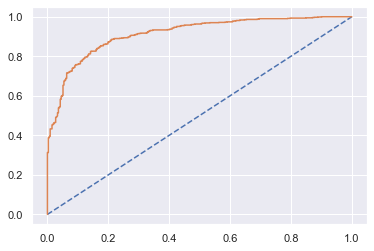

In [778]:
# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
adb_train_auc = roc_auc_score(y_train, probs)
print('adb_train_auc: %.3f' % adb_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [779]:
# Accuracy - Test Data
adb_test_acc=ADB_model.score(X_test, y_test)
adb_test_acc

0.8187772925764192

In [ ]:
#AUC and ROC for the test data

AUC: 0.879


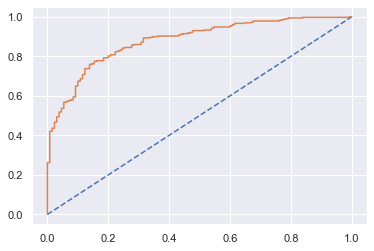

In [780]:
# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
adb_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % adb_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

# Confusion Matrix for the training data

In [781]:
confusion_matrix(y_train, ytrain_predict)

array([[238,  94],
       [ 69, 666]], dtype=int64)

In [782]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.78      0.72      0.74       332
           1       0.88      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.84      0.85      0.85      1067



In [783]:
print("Labour Vote - train data")
adb_train_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(adb_train_metrics).transpose()
adb_train_precision=round(df.loc["1"][0],2)
adb_train_recall=round(df.loc["1"][1],2)
adb_train_f1=round(df.loc["1"][2],2)
print ('adb_train_precision ',adb_train_precision)
print ('adb_train_recall ',adb_train_recall)
print ('adb_train_f1 ',adb_train_f1)

Labour Vote - train data
adb_train_precision  0.88
adb_train_recall  0.91
adb_train_f1  0.89


print("Conservative Vote - train data")
adb_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(adb_metrics).transpose()
adb_train_precision=round(df.loc["0"][0],1)
adb_train_recall=round(df.loc["0"][1],1)
adb_train_f1=round(df.loc["0"][2],1)
print ('adb_train_precision ',adb_train_precision)
print ('adb_train_recall ',adb_train_recall)
print ('adb_train_f1 ',adb_train_f1)

Area under Curve Train data 0.811494959429555


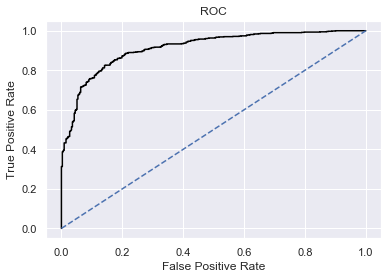

In [784]:
adb_train_fpr, adb_train_tpr,_=roc_curve(y_train,ADB_model.predict_proba(X_train)[:,1])
plt.plot(adb_train_fpr,adb_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
adb_train_roc=roc_auc_score(y_train,ADB_model.predict(X_train))
print('Area under Curve Train data', adb_train_roc)

# Confusion Matrix for test data

In [785]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[ 90,  40],
       [ 43, 285]], dtype=int64)

In [786]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.68      0.69      0.68       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



In [787]:
print("Labour vote - Test data")
adb_test_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(adb_test_metrics).transpose()
adb_test_precision=round(df.loc["1"][0],2)
adb_test_recall=round(df.loc["1"][1],2)
adb_test_f1=round(df.loc["1"][2],2)
print ('adb_test_precision ',adb_test_precision)
print ('adb_test_recall ',adb_test_recall)
print ('adb_test_f1 ',adb_test_f1)

Labour vote - Test data
adb_test_precision  0.88
adb_test_recall  0.87
adb_test_f1  0.87


print("Conservative vote - Test data")
adb_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(adb_metrics).transpose()
adb_test_precision=round(df.loc["0"][0],1)
adb_test_recall=round(df.loc["0"][1],1)
adb_test_f1=round(df.loc["0"][2],1)
print ('adb_test_precision ',adb_test_precision)
print ('adb_test_recall ',adb_test_recall)
print ('adb_test_f1 ',adb_test_f1)

Area under Curve -Test data 0.7806050656660413


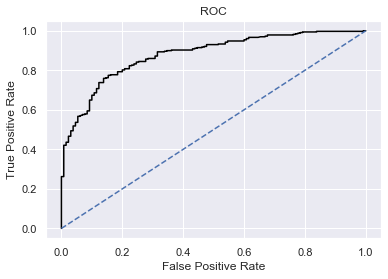

In [788]:
adb_test_fpr, adb_test_tpr,_=roc_curve(y_test,ADB_model.predict_proba(X_test)[:,1])
plt.plot(adb_test_fpr,adb_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
adb_test_roc=roc_auc_score(y_test,ADB_model.predict(X_test))
print('Area under Curve -Test data', adb_test_roc)

In [ ]:
Conclusion

In [ ]:
Accuracy on Test data is 75% and on Train data is 92%.
AUC score of test data is 99% and train data is 99%(same)
AUC-ROC score of test data is 69% and train data is 90%.
Recall(84-97) and Precision(81-93) of class 1 is nearly same for test and train data.
While the model results between training and test sets are not similar, indicating overfitting issues, 
overall prediction of the model is weaker in terms of predicting class 0. Imbalance problem needs to fixed.

In [ ]:
# Model Tuning - ADA Boost

In [789]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)
ada=AdaBoostClassifier()
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}
ada_grid=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='accuracy',n_jobs=1,cv=crossvalidation)

In [790]:
ada_grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=AdaBoostClassifier(), n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [500, 1000, 2000]},
             scoring='accuracy')

# Predicting on Training and Test dataset

In [791]:
ytrain_predict = ada_grid.predict(X_train)
ytest_predict = ada_grid.predict(X_test)

# Getting the Predicted Classes and Probs

In [792]:
ytest_predict_prob=ada_grid.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.537918,0.462082
1,0.531076,0.468924
2,0.485750,0.514250
3,0.499967,0.500033
4,0.481080,0.518920


# Model Evaluation

In [793]:
# Accuracy - Training Data
grid_ada_train_acc=ada_grid.score(X_train, y_train)
grid_ada_train_acc

0.837863167760075

# AUC and ROC for the training data

AUC: 0.900


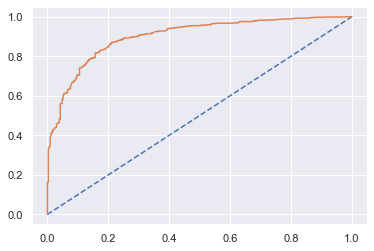

In [795]:
# predict probabilities
probs = ada_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
grid_ada_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % grid_ada_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [796]:
# Accuracy - Test Data
grid_ada_test_acc=ada_grid.score(X_test, y_test)
grid_ada_test_acc

0.8275109170305677

In [ ]:
#AUC and ROC for the test data

AUC: 0.894


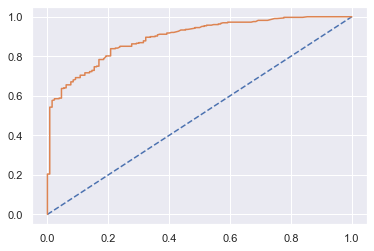

In [797]:
# predict probabilities
probs = ada_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
grid_ada_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % grid_ada_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

# Confusion Matrix for the training data

In [798]:
confusion_matrix(y_train, ytrain_predict)

array([[218, 114],
       [ 59, 676]], dtype=int64)

In [799]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.79      0.66      0.72       332
           1       0.86      0.92      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.79      0.80      1067
weighted avg       0.83      0.84      0.83      1067



In [800]:
print("Labour Vote - train data")
grid_ada_train_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(grid_ada_train_metrics).transpose()
grid_ada_train_precision=round(df.loc["1"][0],2)
grid_ada_train_recall=round(df.loc["1"][1],2)
grid_ada_train_f1=round(df.loc["1"][2],2)
print ('grid_ada_train_precision ',grid_ada_train_precision)
print ('grid_ada_train_recall ',grid_ada_train_recall)
print ('grid_ada_train_f1 ',grid_ada_train_f1)

Labour Vote - train data
grid_ada_train_precision  0.86
grid_ada_train_recall  0.92
grid_ada_train_f1  0.89


print("Conservative Vote - train data")
bag_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(bag_metrics).transpose()
bag_train_precision=round(df.loc["0"][0],1)
bag_train_recall=round(df.loc["0"][1],1)
bag_train_f1=round(df.loc["0"][2],1)
print ('bag_train_precision ',bag_train_precision)
print ('bag_train_recall ',bag_train_recall)
print ('bag_train_f1 ',bag_train_f1)

Area under Curve Train data 0.7881771985902795


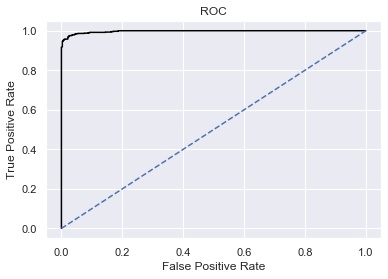

In [801]:
grid_ada_train_fpr, grid_ada_train_tpr,_=roc_curve(y_train,ada_grid.predict_proba(X_train)[:,1])
plt.plot(bag_train_fpr,bag_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
grid_ada_train_roc=roc_auc_score(y_train,ada_grid.predict(X_train))
print('Area under Curve Train data', grid_ada_train_roc)

# Confusion Matrix for test data

In [802]:
cnf_matrix=confusion_matrix(y_test, ytest_predict)
cnf_matrix

array([[ 83,  47],
       [ 32, 296]], dtype=int64)

In [803]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.72      0.64      0.68       130
           1       0.86      0.90      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.77      0.78       458
weighted avg       0.82      0.83      0.82       458



In [804]:
print("Labour vote - Test data")
grid_ada_test_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(grid_ada_test_metrics).transpose()
grid_ada_test_precision=round(df.loc["1"][0],2)
grid_ada_test_recall=round(df.loc["1"][1],2)
grid_ada_test_f1=round(df.loc["1"][2],2)
print ('grid_ada_test_precision ',grid_ada_test_precision)
print ('grid_ada_test_recall ',grid_ada_test_recall)
print ('grid_ada_test_f1 ',grid_ada_test_f1)

Labour vote - Test data
grid_ada_test_precision  0.86
grid_ada_test_recall  0.9
grid_ada_test_f1  0.88


print("Conservative vote - Test data")
bag_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(bag_metrics).transpose()
bag_test_precision=round(df.loc["0"][0],1)
bag_test_recall=round(df.loc["0"][1],1)
bag_test_f1=round(df.loc["0"][2],1)
print ('bag_test_precision ',bag_test_precision)
print ('bag_test_recall ',bag_test_recall)
print ('bag_test_f1 ',bag_test_f1)

Area under Curve -Test data 0.7704502814258911


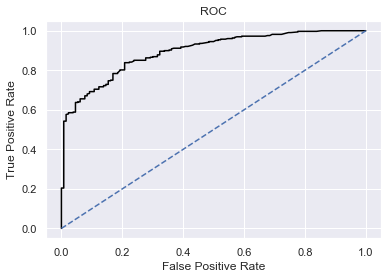

In [805]:
grid_ada_test_fpr, grid_ada_test_tpr,_=roc_curve(y_test,ada_grid.predict_proba(X_test)[:,1])
plt.plot(grid_ada_test_fpr,grid_ada_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
grid_ada_test_auc=roc_auc_score(y_test,ada_grid.predict(X_test))
print('Area under Curve -Test data', grid_ada_test_auc)

In [ ]:
Conclusion - No impact in model tuning

In [ ]:
Accuracy on Test data is 78% and on Train data is 84%.
AUC score of test data is 90% and train data is 90%(same)
AUC-ROC score of test data is 70% and train data is 79%.
Recall and Precision of class 1 is not same for test and train data.
While the model results between training and test sets are nearly(+-9%) similar, indicating no overfitting issues, 
overall prediction of the model is weaker in terms of predicting class 0. Imbalance problem needs to fixed.

# ADA boost- SMOTE

In [806]:
ADB_model_sm = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model_sm.fit(X_train_res,y_train_res)

AdaBoostClassifier(n_estimators=100, random_state=1)

# Predicting on Training and Test dataset

In [807]:
ytrain_predict_res = ADB_model_sm.predict(X_train_res)
#ytest_predict = model.predict(X_test_res)

# Model Evaluation

In [808]:
# Accuracy - Training Data
ada_sm_train_acc=ADB_model_sm.score(X_train_res, y_train_res)
ada_sm_train_acc

0.8727891156462585

# AUC and ROC for the training data

AUC: 0.949


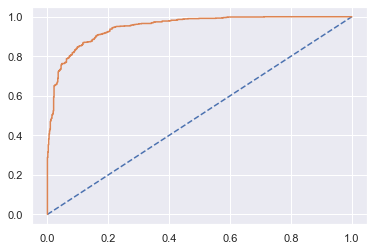

In [809]:
# predict probabilities
probs = ADB_model_sm.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ada_sm_train_auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % ada_sm_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

# Confusion Matrix for the training data

In [810]:
confusion_matrix(y_train_res, ytrain_predict_res)

array([[649,  86],
       [101, 634]], dtype=int64)

In [811]:
print(classification_report(y_train_res, ytrain_predict_res))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       735
           1       0.88      0.86      0.87       735

    accuracy                           0.87      1470
   macro avg       0.87      0.87      0.87      1470
weighted avg       0.87      0.87      0.87      1470



In [812]:
print("Labour Vote - train data")
ada_sm_train_metrics=classification_report(y_train_res, ytrain_predict_res,output_dict=True)
df=pd.DataFrame(ada_sm_train_metrics).transpose()
ada_sm_train_precision=round(df.loc["1"][0],2)
ada_sm_train_recall=round(df.loc["1"][1],2)
ada_sm_train_f1=round(df.loc["1"][2],2)
print ('ada_sm_train_precision ',ada_sm_train_precision)
print ('ada_sm_train_recall ',ada_sm_train_recall)
print ('ada_sm_train_f1 ',ada_sm_train_f1)

Labour Vote - train data
ada_sm_train_precision  0.88
ada_sm_train_recall  0.86
ada_sm_train_f1  0.87


print("Conservative Vote - train data")
lgr_metrics=classification_report(y_train_res, ytrain_predict_res,output_dict=True)
df=pd.DataFrame(lgr_metrics).transpose()
lgr_train_precision=round(df.loc["0"][0],2)
lgr_train_recall=round(df.loc["0"][1],2)
lgr_train_f1=round(df.loc["0"][2],2)
print ('lgr_train_precision ',lgr_train_precision)
print ('lgr_train_recall ',lgr_train_recall)
print ('lgr_train_f1 ',lgr_train_f1)

Area under Curve Train data 0.8727891156462585


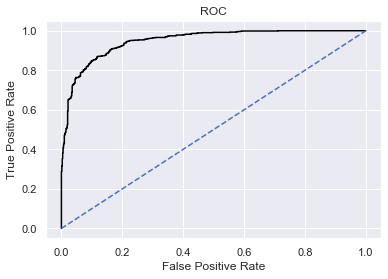

In [813]:
ada_sm_train_fpr, ada_sm_train_tpr,_=roc_curve(y_train_res,ADB_model_sm.predict_proba(X_train_res)[:,1])
plt.plot(ada_sm_train_fpr,ada_sm_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
ada_sm_train_roc=roc_auc_score(y_train_res,ADB_model_sm.predict(X_train_res))
print('Area under Curve Train data', ada_sm_train_roc)

In [ ]:
Conclusion

In [ ]:
Accuracy on on Train data is 87%.(5% dec)
AUC score of train data is 95%(dec 4%)
AUC-ROC score of train data is 87%(dec 3%)
Recall(8-89) and Precision(85-89) of both class is same for train data.
No imbalance issues.

 # XGBoost

In [1]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [2]:

XGB_model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
XGB_model.fit(X_train, y_train)

NameError: name 'X_train' is not defined

# Comparison of the performance metrics from the basic 5 models

In [816]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[lr_train_acc,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
        'LR Test':[lr_test_acc,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1],
       'LDA Train':[ldam_train_acc,ldam_train_auc,ldam_train_recall,ldam_train_precision,ldam_train_f1],
        'LDA Test':[ldam_test_acc,ldam_test_auc,ldam_test_recall,ldam_test_precision,ldam_test_f1],
       ' KNN Train':[Knn_train_acc,knn_train_auc,knn_train_recall,knn_train_precision,knn_train_f1],
        'KNN Test':[knn_test_acc,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1],
        'NB Train':[nb_train_acc,nb_train_auc,nb_train_recall,nb_train_precision,nb_train_f1],
        'NB Test':[nb_test_acc,nb_test_auc,nb_test_recall,nb_test_precision,nb_test_f1],
       'SVM Train':[svm_train_acc,svm_train_auc,svm_train_recall,svm_train_precision,svm_train_f1],
        'SVM Test':[svm_test_acc,svm_test_auc,svm_test_recall,svm_test_precision,svm_test_f1]},index=index)
round(data,2)

,LR Train,LR Test,LDA Train,LDA Test,KNN Train,KNN Test,NB Train,NB Test,SVM Train,SVM Test
Accuracy,0.81,0.82,0.84,0.82,0.86,0.82,0.83,0.82,0.86,0.83
AUC,0.89,0.88,0.89,0.88,0.83,0.79,0.80,0.88,0.82,0.90
Recall,0.91,0.89,0.90,0.88,0.91,0.86,0.88,0.86,0.93,0.90
Precision,0.87,0.87,0.87,0.87,0.89,0.89,0.88,0.89,0.88,0.86
F1 Score,0.89,0.88,0.89,0.87,0.90,0.87,0.88,0.87,0.90,0.88


In [ ]:
# SVM score is better based on Accuracy and Recall

In [ ]:
Comparison of the performance metrics from the basic 5 models with Model Tuning

In [837]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[grid_lr_train_acc,grid_lr_train_auc,grid_lr_train_recall,grid_lr_train_precision,grid_lr_train_f1],
        'LR Test':[grid_lr_test_acc,grid_lr_test_auc,grid_lr_test_recall,grid_lr_test_precision,grid_lr_test_f1],
       'LDA Train':[grid_lda_train_acc,grid_lda_train_auc,grid_lda_train_recall,grid_lda_train_precision,grid_lda_train_f1],
        'LDA Test':[grid_lda_test_acc,grid_lda_test_auc,grid_lda_test_recall,grid_lda_test_precision,grid_lda_test_f1],
       ' KNN Train':[grid_knn_train_acc,grid_knn_train_auc,grid_knn_train_recall,grid_knn_train_precision,grid_knn_train_f1],
        'KNN Test':[grid_knn_test_acc,grid_knn_test_auc,grid_knn_test_recall,grid_knn_test_precision,grid_knn_test_f1],
        'NB Train':[grid_nb_train_acc,grid_nb_train_auc,grid_nb_train_recall,grid_nb_train_precision,grid_nb_train_f1],
        'NB Test':[grid_nb_test_acc,grid_nb_test_auc,grid_nb_test_recall,grid_nb_test_precision,grid_nb_test_f1],
       'SVM Train':[grid_svm_train_acc,grid_svm_train_auc,grid_svm_train_recall,grid_svm_train_precision,grid_svm_train_f1],
        'SVM Test':[grid_svm_test_acc,grid_svm_test_auc,grid_svm_test_recall,grid_svm_test_precision,grid_svm_test_f1]},index=index)
round(data,2)

,LR Train,LR Test,LDA Train,LDA Test,KNN Train,KNN Test,NB Train,NB Test,SVM Train,SVM Test
Accuracy,0.84,0.82,0.84,0.82,0.84,0.83,0.81,0.82,0.84,0.83
AUC,0.89,0.88,0.89,0.89,0.90,0.90,0.80,0.89,0.89,0.88
Recall,0.91,0.89,0.90,0.88,0.90,0.88,0.92,0.90,0.91,0.89
Precision,0.87,0.87,0.88,0.88,0.87,0.88,0.83,0.86,0.87,0.87
F1 Score,0.89,0.88,0.89,0.88,0.88,0.88,0.87,0.88,0.89,0.88


In [ ]:
# All models perform more or less equal within the range of 81-91. SVM is better in terms of Accuracy and recall

In [ ]:
# ROC scores

In [835]:
print("LR ROC train score",lr_train_roc)
print("LR ROC test score",lr_test_roc)
print("LDA ROC train score",ldam_train_roc)
print("LDA ROC test score",ldam_test_roc)
print("KNN ROC train score",knn_train_auc)
print("KNN ROC test score",knn_test_auc)
print("NB ROC train score",nb_train_auc)
print("NB ROC test score",nb_test_roc)
print("SVM ROC train score",svm_train_auc)
print("SVM ROC test score",svm_test_roc)


LR ROC train score 0.8001270387673142
LR ROC test score 0.7567307692307692
LDA ROC train score 0.8044012785837227
LDA ROC test score 0.7713180112570357
KNN ROC train score 0.8337943611179413
KNN ROC test score 0.7929409005628518
NB ROC train score 0.8022621096631424
NB ROC test score 0.7929409005628518
SVM ROC train score 0.8238853372674371
SVM ROC test score 0.7689258911819887


In [ ]:
# KNN score is better.

In [ ]:
# After model tuning

In [839]:
print("LR ROC train score",grid_lr_train_roc)
print("LR ROC test score",grid_lr_test_auc)
print("LDA ROC train score",grid_lda_train_roc)
print("LDA ROC test score",grid_lda_test_roc)
print("KNN ROC train score",grid_knn_train_auc)
print("KNN ROC test score",grid_knn_test_auc)
print("NB ROC train score",grid_nb_train_auc)
print("NB ROC test score",grid_nb_test_roc)
print("SVM ROC train score",grid_svm_train_auc)
print("SVM ROC test score",grid_svm_test_roc)


LR ROC train score 0.8001270387673142
LR ROC test score 0.8832786116322702
LDA ROC train score 0.8074133267764938
LDA ROC test score 0.7813320825515948
KNN ROC train score 0.901885091385952
KNN ROC test score 0.8974319887429644
NB ROC train score 0.8007089582821081
NB ROC test score 0.7589118198874296
SVM ROC train score 0.8893717728055077
SVM ROC test score 0.7735694183864915


# ROC Curve for the 5 basic models on the Training data

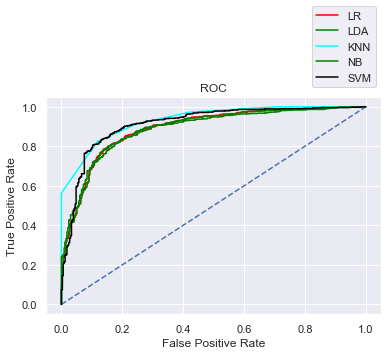

In [820]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_train_fpr, lr_train_tpr,color='red',label="LR")
plt.plot(ldam_train_fpr,ldam_train_tpr,color='green',label="LDA")
plt.plot(knn_train_fpr,knn_train_tpr,color='cyan',label="KNN")
plt.plot(nb_train_fpr,nb_train_tpr,color='green',label="NB")
plt.plot(svm_train_fpr,svm_train_tpr,color='black',label="SVM")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

In [ ]:
ROC curve for the train5 models on the train data after model tuning

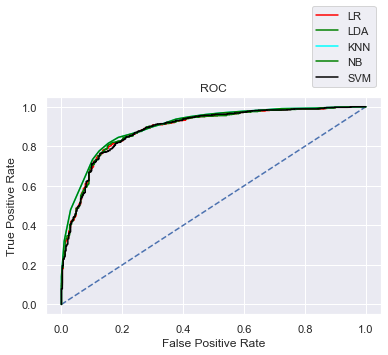

In [863]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(grid_lr_train_fpr, grid_lr_train_tpr,color='red',label="LR")
plt.plot(grid_lda_train_fpr,grid_lda_train_tpr,color='green',label="LDA")
plt.plot(grid_knn_train_fpr,grid_knn_train_tpr,color='cyan',label="KNN")
plt.plot(grid_nb_train_fpr,grid_train_train_tpr,color='green',label="NB")
plt.plot(grid_svm_train_fpr,grid_svm_train_tpr,color='black',label="SVM")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

In [ ]:
ROC curve after model tuning - 5 basic models - test data

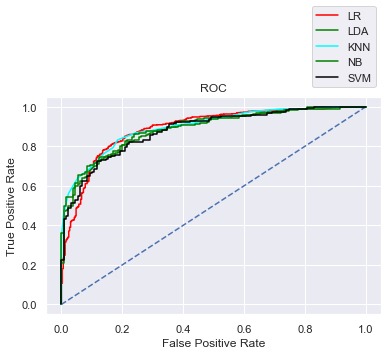

In [868]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(grid_lr_test_fpr, grid_lr_test_tpr,color='red',label="LR")
plt.plot(grid_lda_test_fpr,grid_lda_test_tpr,color='green',label="LDA")
plt.plot(grid_knn_test_fpr,grid_knn_test_tpr,color='cyan',label="KNN")
plt.plot(grid_nb_test_fpr,grid_nb_test_tpr,color='green',label="NB")
plt.plot(grid_svm_test_fpr,grid_svm_test_tpr,color='black',label="SVM")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

# ROC Curve for the 5 models on the Test data

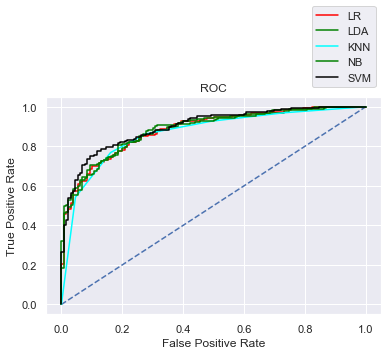

In [821]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_test_fpr, lr_test_tpr,color='red',label="LR")
plt.plot(ldam_test_fpr,ldam_test_tpr,color='green',label="LDA")
plt.plot(knn_test_fpr,knn_test_tpr,color='cyan',label="KNN")
plt.plot(nb_test_fpr,nb_test_tpr,color='green',label="NB")
plt.plot(svm_test_fpr,svm_test_tpr,color='black',label="SVM")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

In [826]:
#with smote
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[lr_sm_train_acc,lr_sm_train_auc,lr_sm_train_recall,lr_sm_train_precision,lr_sm_train_f1],
        'LDA Train':[lda_sm_train_acc,lda_sm_train_auc,lda_sm_train_recall,lda_sm_train_precision,lda_sm_train_f1],
        ' KNN Train':[knn_sm_train_acc,knn_sm_train_auc,knn_sm_train_recall,knn_sm_train_precision,knn_sm_train_f1],
        'NB Train':[nb_sm_train_acc,nb_sm_train_auc,nb_sm_train_recall,nb_sm_train_precision,nb_sm_train_f1],
        'SVM Train':[svm_sm_train_acc,svm_sm_train_auc,svm_sm_train_recall,svm_sm_train_precision,svm_sm_train_f1]},index=index)
round(data,2)

,LR Train,LDA Train,KNN Train,NB Train,SVM Train
Accuracy,0.83,0.83,0.89,0.83,0.86
AUC,0.90,0.90,0.97,0.90,0.93
Recall,0.83,0.83,0.82,0.83,0.85
Precision,0.82,0.83,0.94,0.83,0.88
F1 Score,0.83,0.83,0.88,0.83,0.86


In [ ]:
SVM with SMOTE is better in terms of precision and recall value.
KNN values are higher, but precision-recall difference value is not low.

In [ ]:
# ROC Curve for the 5 basic models on the Training data with SMOTE

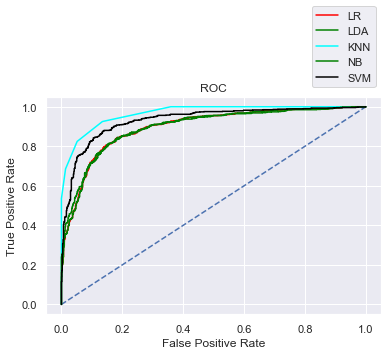

In [827]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_sm_train_fpr, lr_sm_train_tpr,color='red',label="LR")
plt.plot(lda_sm_train_fpr,lda_sm_train_tpr,color='green',label="LDA")
plt.plot(knn_sm_train_fpr,knn_sm_train_tpr,color='cyan',label="KNN")
plt.plot(nb_sm_train_fpr,nb_sm_train_tpr,color='green',label="NB")
plt.plot(svm_sm_train_fpr,svm_sm_train_tpr,color='black',label="SVM")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

In [851]:
#Performance metrics of Bagging and Ada boost before tuning
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Bagging Train':[bag_train_acc,bag_train_auc,bag_train_recall,bag_train_precision,bag_train_f1],
        'Bagging Test':[bag_test_acc,bag_test_auc,bag_test_recall,bag_test_precision,bag_test_f1],
       'Ada Boost Train':[adb_train_acc,adb_train_auc,adb_train_recall,adb_train_precision,adb_train_f1],
        'Ada Boost Test':[adb_test_acc,adb_test_auc,adb_test_recall,adb_test_precision,adb_test_f1]},index=index)
round(data,2)

,Bagging Train,Bagging Test,Ada Boost Train,Ada Boost Test
Accuracy,0.97,0.84,0.85,0.82
AUC,0.95,0.80,0.91,0.88
Recall,0.99,0.89,0.91,0.87
Precision,0.96,0.88,0.88,0.88
F1 Score,0.98,0.89,0.89,0.87


In [ ]:
#Bagging performs better than ADA boost before tuning

In [845]:
#Performance metrics of Bagging and Ada boost after tuning
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Bagging Train':[grid_bag_train_acc,grid_bag_train_auc,grid_bag_train_recall,grid_bag_train_precision,grid_bag_train_f1],
        'Bagging Test':[grid_bag_test_acc,grid_bag_test_auc,grid_bag_test_recall,grid_bag_test_precision,grid_bag_test_f1],
       'Ada Boost Train':[grid_ada_train_acc,grid_ada_train_auc,grid_ada_train_recall,grid_ada_train_precision,grid_ada_train_f1],
        'Ada Boost Test':[grid_ada_test_acc,grid_ada_test_auc,grid_ada_test_recall,grid_ada_test_precision,grid_ada_test_f1]},index=index)
round(data,2)

,Bagging Train,Bagging Test,Ada Boost Train,Ada Boost Test
Accuracy,0.84,0.81,0.84,0.83
AUC,0.91,0.89,0.90,0.77
Recall,0.92,0.89,0.92,0.90
Precision,0.86,0.85,0.86,0.86
F1 Score,0.89,0.87,0.89,0.88


In [ ]:
#Both models performs more or less equal after tuning

In [ ]:
# ADA boost performs better in terms of accuracy and F! score(train/test)

In [ ]:
# ROC curve - 2 models - train data

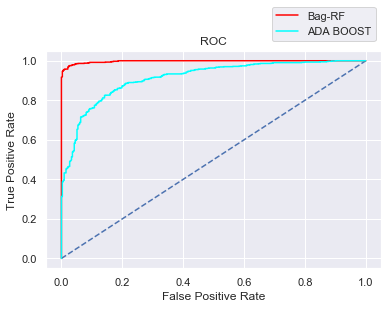

In [848]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(bag_train_fpr, bag_train_tpr,color='red',label="Bag-RF")
plt.plot(adb_train_fpr,adb_train_tpr,color='cyan',label="ADA BOOST")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

In [ ]:
ROC score of train data - Bag_RF model is better than ADA boost model.

In [ ]:
ROC curve- test data

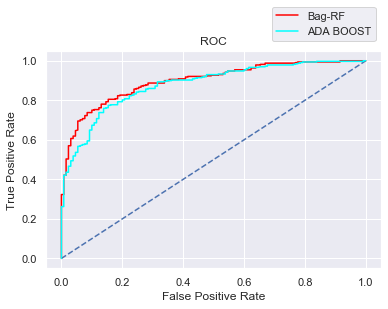

In [852]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(bag_test_fpr, bag_test_tpr,color='red',label="Bag-RF")
plt.plot(adb_test_fpr,adb_test_tpr,color='cyan',label="ADA BOOST")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

In [ ]:
# more or less equal

In [ ]:
#Model Tuning - Bag_RF and ADA boost

In [855]:
#Performance metrics of Bagging and Ada boost after tuning - train and test data
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Bagging Train':[grid_bag_train_acc,grid_bag_train_auc,grid_bag_train_recall,grid_bag_train_precision,grid_bag_train_f1],
        'Bagging Test':[grid_bag_test_acc,grid_bag_test_auc,grid_bag_test_recall,grid_bag_test_precision,grid_bag_test_f1],
       'Ada Boost Train':[grid_ada_train_acc,grid_ada_train_auc,grid_ada_train_recall,grid_ada_train_precision,grid_ada_train_f1],
        'Ada Boost Test':[grid_ada_test_acc,grid_ada_test_auc,grid_ada_test_recall,grid_ada_test_precision,grid_ada_test_f1]},index=index)
round(data,2)

,Bagging Train,Bagging Test,Ada Boost Train,Ada Boost Test
Accuracy,0.84,0.81,0.84,0.83
AUC,0.91,0.89,0.90,0.77
Recall,0.92,0.89,0.92,0.90
Precision,0.86,0.85,0.86,0.86
F1 Score,0.89,0.87,0.89,0.88


In [ ]:
ROC curve after model tuning - train data

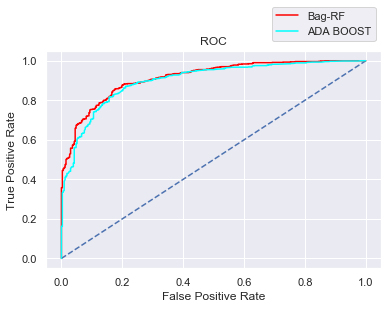

In [854]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(grid_bag_train_fpr, grid_bag_train_tpr,color='red',label="Bag-RF")
plt.plot(grid_ada_train_fpr,grid_ada_train_tpr,color='cyan',label="ADA BOOST")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

In [ ]:
# more or less equal

In [ ]:
# ROC curve after tuning - Test data

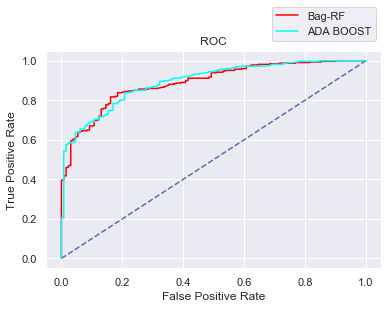

In [857]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(grid_bag_test_fpr, grid_bag_test_tpr,color='red',label="Bag-RF")
plt.plot(grid_ada_test_fpr,grid_ada_test_tpr,color='cyan',label="ADA BOOST")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

In [ ]:
#More or less equal

In [ ]:
#with SMOTE

In [858]:
#Performance metrics of Bagging and Ada boost after SMOTE - train data
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Bagging Train':[bag_sm_train_acc,bag_sm_train_auc,bag_sm_train_recall,bag_sm_train_precision,bag_sm_train_f1],
                     'Ada Boost Train':[ada_sm_train_acc,ada_sm_train_auc,ada_sm_train_recall,ada_sm_train_precision,ada_sm_train_f1],
        },index=index)
round(data,2)

,Bagging Train,Ada Boost Train
Accuracy,0.98,0.87
AUC,1.00,0.95
Recall,0.98,0.86
Precision,0.98,0.88
F1 Score,0.98,0.87


In [ ]:
ROC curve after SMOTE - Bagging and Ada boost

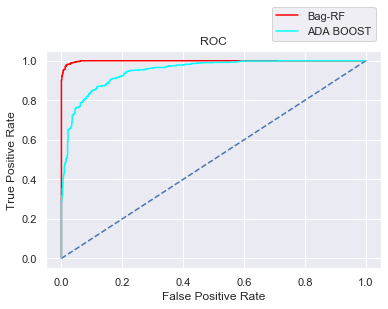

In [859]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(bag_sm_train_fpr, bag_sm_train_tpr,color='red',label="Bag-RF")
plt.plot(ada_sm_train_fpr,ada_sm_train_tpr,color='cyan',label="ADA BOOST")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')